# Ellipsoid Lightcurves Period Comparison

This notebook is used for comparing various parameters before and after ellipsoid crossing times of variable stars. This contains most of the code for the variability analysis.

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.coordinates as coord
from astropy import constants as const
from astropy import units as u
from astropy.time import Time
from astropy.table import Table, QTable, vstack, hstack
import os

from astroquery.gaia import Gaia

import sys
sys.path.append('..')
import ellipsoid
import lightCurve
import seto

from astropy.timeseries import LombScargle, TimeSeries
import random

### Read in the desired file and set global parameters
If using the ```queryGaia.py``` script to download Gaia data, the file names are:

```GCNS_var``` -- variable stars in GCNS

```Gaia_var``` -- variable stars in Gaia DR3

```GCNS``` -- stars in GCNS

```Gaia``` -- stars in Gaia DR3

The tolerance is in lightyears, and the default start time is the time of the first Gaia alert

In [3]:
file_name = '../Gaia_var_class'
c1, stars = ellipsoid.readFile(file_name)
tol = 0.1

The default event (i.e. the second focal point of the SETI Ellipsoid) is SN 1987A, and its parameters are set below

In [4]:
#Properties of SN1987A
tA = Time({'year': 1987, 'month': 2, 'day': 23}, format='ymdhms')

cA_radec = SkyCoord.from_name('SN 1987A')

# Panagia (1999) https://ui.adsabs.harvard.edu/abs/1999IAUS..190..549P/abstract
dA = 51.4 * u.kpc
dA_err = 1.2 * u.kpc

cA = SkyCoord(ra=cA_radec.ra, dec=cA_radec.dec, distance=dA)

In [5]:
# Properties of SN1054 (Crab Nebula)
tC = Time({'year': 1054, 'month': 7, 'day': 4}, format='ymdhms')

cC_radec = SkyCoord.from_name('SN 1054')

# https://vizier.cds.unistra.fr/viz-bin/VizieR-4 database (photogeometric distance)
dC = 1899.33655000 * u.pc
dC_err = (2193.16919000-1711.93213000)/2 * u.pc

cC = SkyCoord(ra=cC_radec.ra, dec=cC_radec.dec, distance=dC)

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  ErfaWarning)


In [6]:
# Properties of SN1604 (Kepler)
tK = Time({'year': 1604, 'month': 10, 'day': 9}, format='ymdhms')

cK_radec = SkyCoord.from_name('SN 1604')

dK = 16600 * u.lyr
dK_err = 0.14*dK

cK = SkyCoord(ra=cK_radec.ra, dec=cK_radec.dec, distance=dK)

In [7]:
# Properties of SN1572 (Tycho)
tT = Time({'year': 1572, 'month': 11, 'day': 2}, format='ymdhms')

cT_radec = SkyCoord.from_name('SN 1572')

dT = 8970 * u.lyr
dT_err = 0.09*dT

cT = SkyCoord(ra=cT_radec.ra, dec=cT_radec.dec, distance=dT)

In [8]:
len(c1)

9322432

### Get table of crossing stars

```c1_x``` contains astropy SkyCoord objects of each star that has crossed (within some tolerance) each of the 4 ellipsoids since the start time

```stars_x``` is a table with all the relevant information for each of the stars

In [9]:
cA_x, starsA_x = ellipsoid.crossErrorEllipsoid(cA, tA, c1, stars, tol)
starsA_x = hstack([starsA_x, Table({'xtime' : Time(ellipsoid.xTime(cA_x, c0=cA, t0=tA), format='jd')})])
starsA_x = hstack([starsA_x, Table({'seto' : np.full(len(starsA_x), False)})])
print(f'{len(starsA_x)} stars have crossed the SN1987A ellipsoid during Gaia DR3 data collection time')

217 stars have crossed the SN1987A ellipsoid during Gaia DR3 data collection time


In [10]:
cC_x, starsC_x = ellipsoid.crossErrorEllipsoid(cC, tC, c1, stars, tol)
starsC_x = hstack([starsC_x, Table({'xtime' : Time(ellipsoid.xTime(cC_x, c0=cC, t0=tC), format='jd')})])
starsC_x = hstack([starsC_x, Table({'seto' : np.full(len(starsC_x), False)})])
print(f'{len(starsC_x)} stars have crossed the SN1054 ellipsoid during Gaia DR3 data collection time')

8 stars have crossed the SN1054 ellipsoid during Gaia DR3 data collection time


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)


In [11]:
cK_x, starsK_x = ellipsoid.crossErrorEllipsoid(cK, tK, c1, stars, tol)
starsK_x = hstack([starsK_x, Table({'xtime' : Time(ellipsoid.xTime(cK_x, c0=cK, t0=tK), format='jd')})])
starsK_x = hstack([starsK_x, Table({'seto' : np.full(len(starsK_x), False)})])
print(f'{len(starsK_x)} stars have crossed the SN1054 ellipsoid during Gaia DR3 data collection time')

121 stars have crossed the SN1054 ellipsoid during Gaia DR3 data collection time


In [12]:
cT_x, starsT_x = ellipsoid.crossErrorEllipsoid(cT, tT, c1, stars, tol)
starsT_x = hstack([starsT_x, Table({'xtime' : Time(ellipsoid.xTime(cT_x, c0=cT, t0=tT), format='jd')})])
starsT_x = hstack([starsT_x, Table({'seto' : np.full(len(starsT_x), False)})])
print(f'{len(starsT_x)} stars have crossed the SN1054 ellipsoid during Gaia DR3 data collection time')

119 stars have crossed the SN1054 ellipsoid during Gaia DR3 data collection time


In [13]:
stars_x = vstack([starsA_x, starsC_x, starsK_x, starsT_x])
c1_x = coord.concatenate([cA_x, cC_x, cK_x, cT_x])

#### Also get Seto stars

In [15]:
startTime = Time('2014-07-25T10:30')
endTime = Time('2017-05-28T08:44')

In [16]:
setocC_x, setostarsC_x = seto.rings(cC, tC, c1, startTime, endTime, returnTable=True, star_table=stars)
setostarsC_x = hstack([setostarsC_x, Table({'seto' : np.full(len(setostarsC_x), True)})])
print(f'{len(setostarsC_x)} stars have crossed the SN1054 Seto scheme during Gaia DR3 data collection time')

271 stars have crossed the SN1054 Seto scheme during Gaia DR3 data collection time


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 786838 of "dubious year (Note 4)"
  ErfaWarning)


In [17]:
setocK_x, setostarsK_x = seto.rings(cK, tK, c1, startTime, endTime, returnTable=True, star_table=stars)
setostarsK_x = hstack([setostarsK_x, Table({'seto' : np.full(len(setostarsK_x), True)})])
print(f'{len(setostarsK_x)} stars have crossed the SN1604 Seto scheme during Gaia DR3 data collection time')

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 2612086 of "dubious year (Note 4)"
  ErfaWarning)


53 stars have crossed the SN1604 Seto scheme during Gaia DR3 data collection time


In [18]:
setocT_x, setostarsT_x = seto.rings(cT, tT, c1, startTime, endTime, returnTable=True, star_table=stars)
setostarsT_x = hstack([setostarsT_x, Table({'seto' : np.full(len(setostarsT_x), True)})])
print(f'{len(setostarsT_x)} stars have crossed the SN1572 Seto scheme during Gaia DR3 data collection time')

79 stars have crossed the SN1572 Seto scheme during Gaia DR3 data collection time


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 1221374 of "dubious year (Note 4)"
  ErfaWarning)


In [235]:
stars_x = vstack([stars_x, setostarsC_x, setostarsK_x, setostarsT_x])
c1_x = coord.concatenate([c1_x, setocC_x, setocK_x, setocT_x])

In [20]:
ellipsoidUncertainties = (stars_x[stars_x['seto']==False]['dist84']-stars_x[stars_x['seto']==False]['dist16'])/2

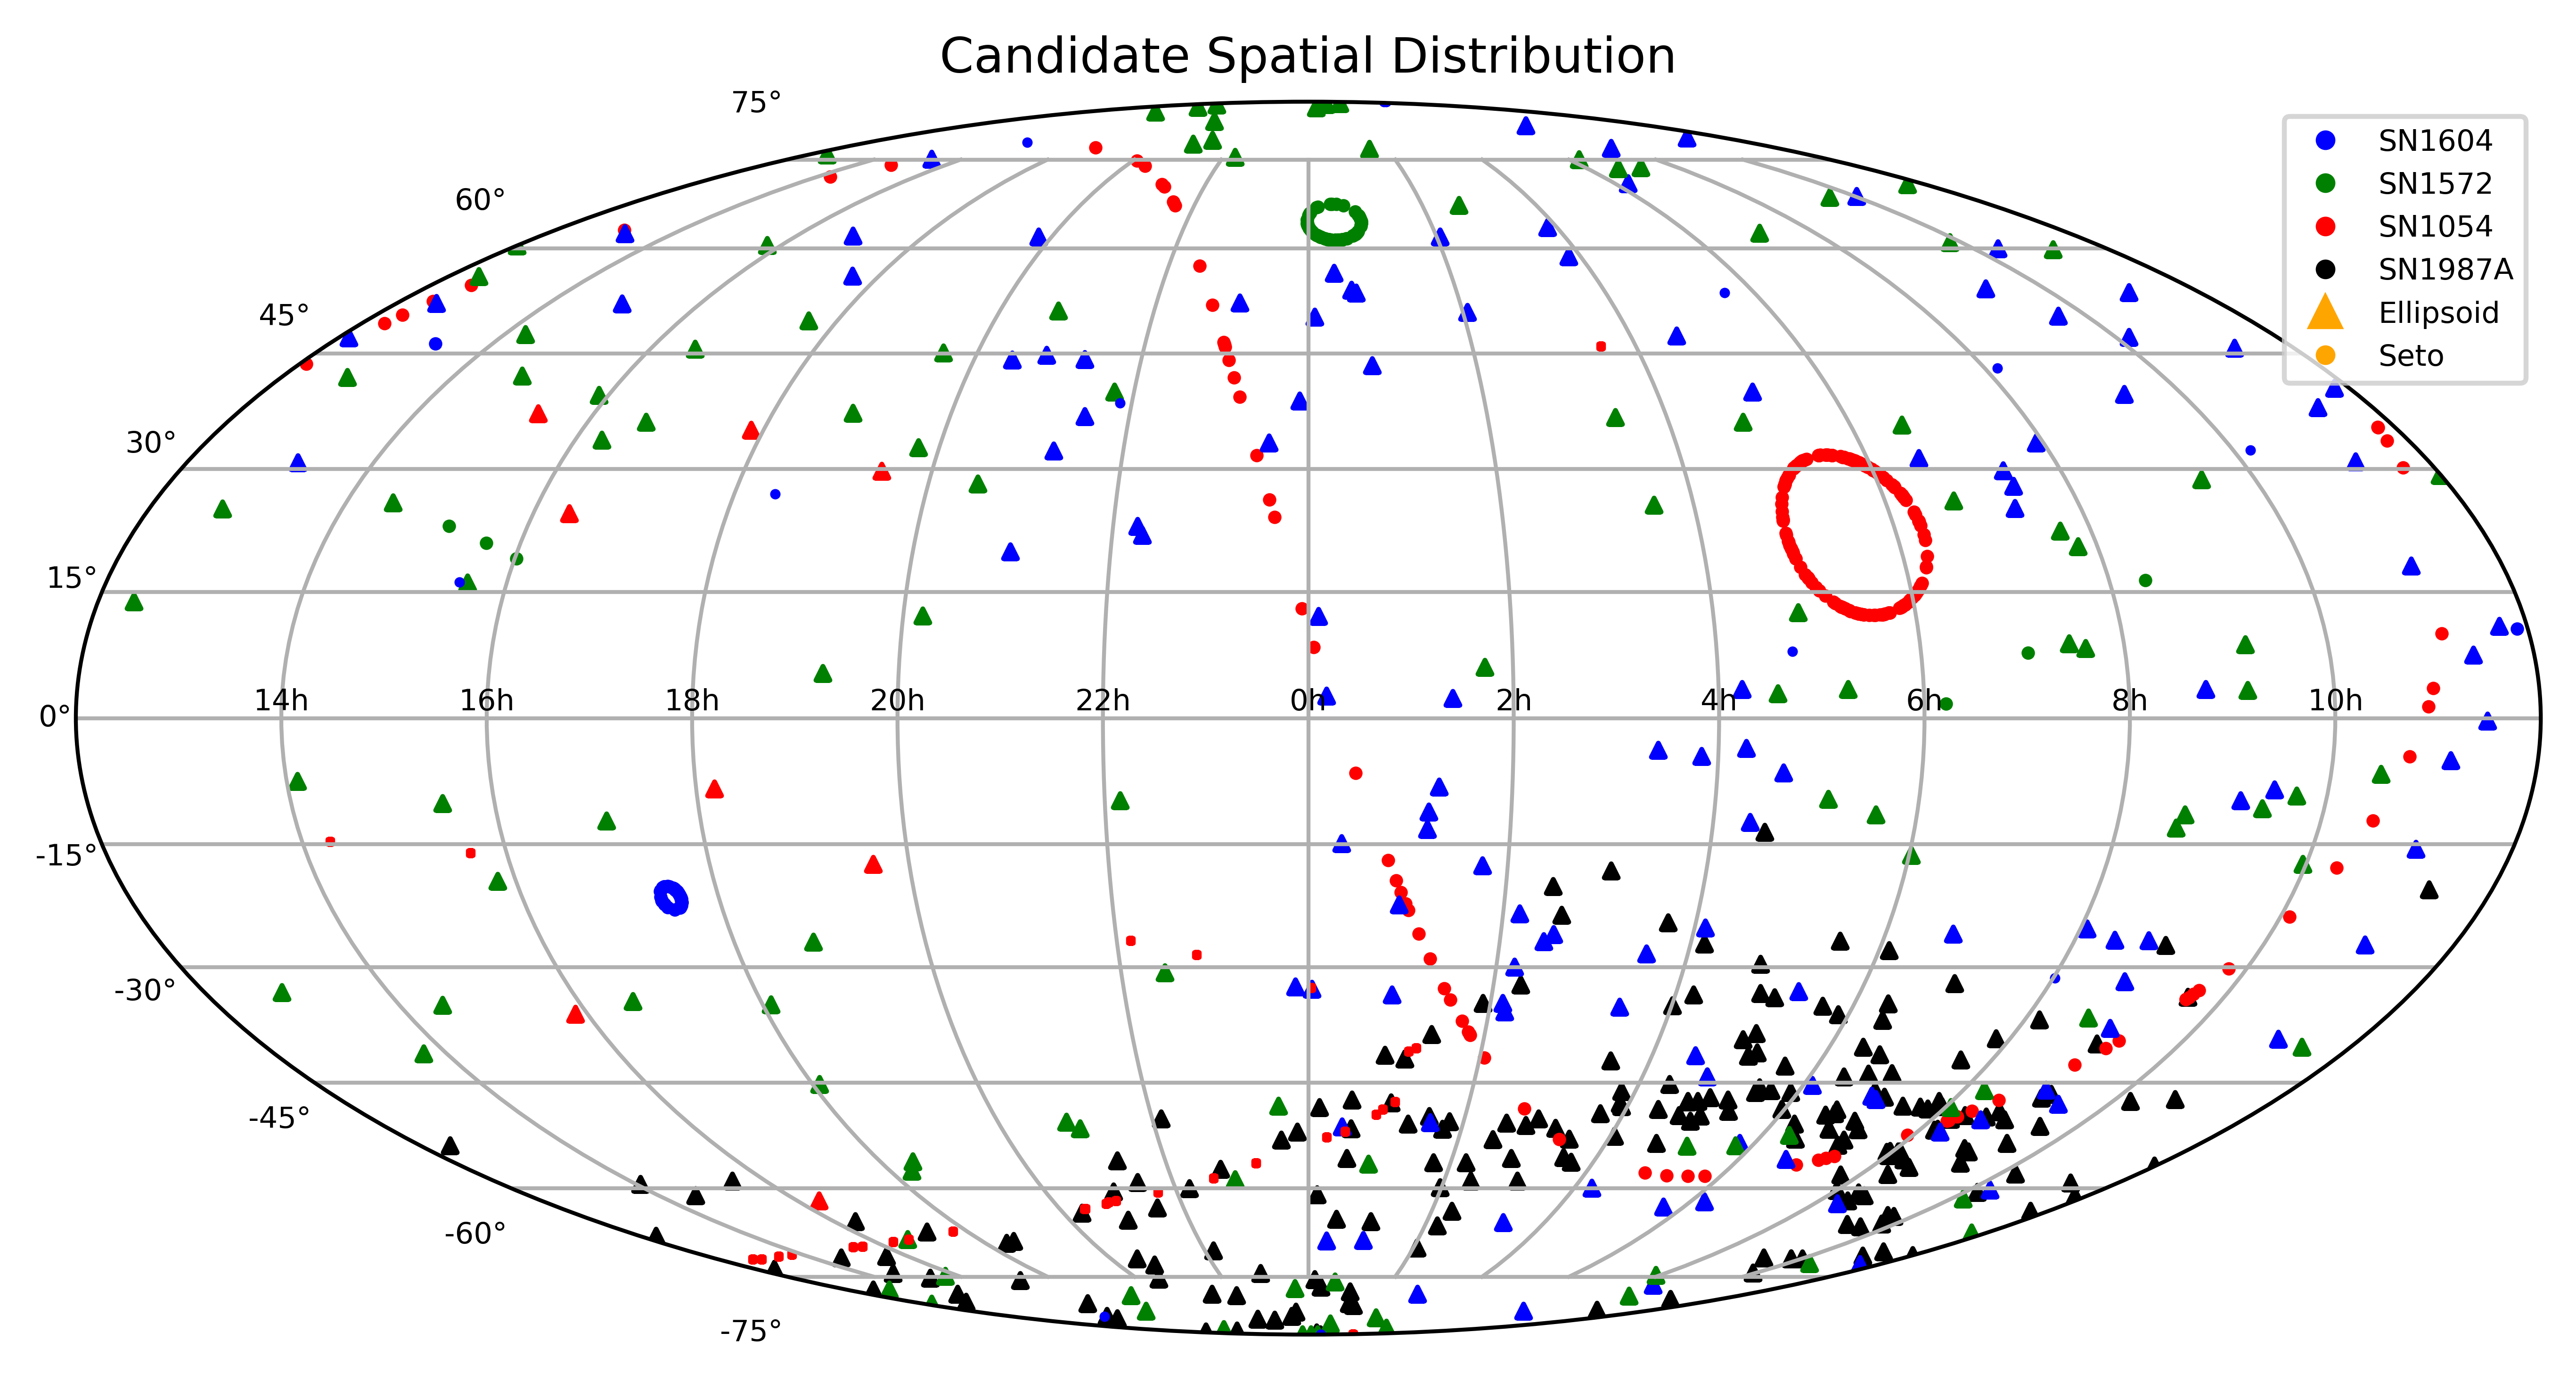

In [21]:
fig = plt.figure(figsize=(9,6), dpi=750)
ax = fig.add_subplot(111, projection="mollweide")


from matplotlib.lines import Line2D
legend_labels = [Line2D([0], [0], color='b', marker='.', lw=0, label=f'SN1604'),
                Line2D([0], [0], color='g', marker='.', lw=0, label=f'SN1572'),
                Line2D([0], [0], color='r', marker='.', lw=0, label=f'SN1054'),
                Line2D([0], [0], color='black', marker='.', lw=0, label=f'SN1987A'),
                Line2D([0], [0], color='orange', marker='^', lw=0, label=f'Ellipsoid'),
                Line2D([0], [0], color='orange', marker='.', lw=0, label=f'Seto')]


ax.scatter(cA_x.ra.wrap_at(180*u.degree).radian, cA_x.dec.radian, c='black', marker='^', s=8)

ax.scatter(cC_x.ra.wrap_at(180*u.degree).radian, cC_x.dec.radian, c='r', marker='^', s=8)
ax.scatter(setocC_x.ra.wrap_at(180*u.degree).radian, setocC_x.dec.radian, c='r', marker='.', s=12)

ax.scatter(cK_x.ra.wrap_at(180*u.degree).radian, cK_x.dec.radian, c='b', marker='^', s=8)
ax.scatter(setocK_x.ra.wrap_at(180*u.degree).radian, setocK_x.dec.radian, c='b', marker='.', s=12)

ax.scatter(cT_x.ra.wrap_at(180*u.degree).radian, cT_x.dec, c='g', marker='^', s=8)
ax.scatter(setocT_x.ra.wrap_at(180*u.degree).radian, setocT_x.dec.radian, c='g', marker='.', s=12)


ax.scatter(c1_x[stars_x['seto']==True].ra.wrap_at(180*u.degree), c1_x[stars_x['seto']==True].dec, c='r', marker='s', s=1)
ax.scatter(c1_x[stars_x['seto']==False].ra.wrap_at(180*u.degree), c1_x[stars_x['seto']==False].dec, c='b', marker='.', s=5)



ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(axis='both', labelsize=6)
ax.grid(True)


ax.set_title('Candidate Spatial Distribution', fontsize=10)
ax.legend(handles=legend_labels, prop={'size': 6})

plt.savefig('../Figures/All_Crossings.pdf', dpi=500, format='pdf', bbox_inches='tight')

### Login to Gaia archive

Creating and logging into a Gaia archive account allows for larger data downloads

You can register here:
https://www.cosmos.esa.int/web/gaia-users/register

In [ ]:
Gaia.login()

### Get lightcurves

When downloading, light curves will all be in one table (lc_merged).

In [22]:
ids = stars_x['id']
lc_merged = lightCurve.retrieveLCs(ids)

### Make dictionaries for each band

Each source is observed in three bands by Gaia (G, RP, BP), so here we create a dictionary for each band, with the keys equal to the source IDs and the values equal to the light curve table for that source and band

In [23]:
glcDict = {}
bplcDict = {}
rplcDict = {}

In [24]:
for sid in ids:
    glc, bplc, rplc = lightCurve.getLC(lc_merged, sid, 'G'), lightCurve.getLC(lc_merged, sid, 'BP'), lightCurve.getLC(lc_merged, sid, 'RP')
    glcDict[str(sid)], bplcDict[str(sid)], rplcDict[str(sid)] = glc, bplc, rplc

### Check variable classes

In [25]:
lcChoices = list(glcDict.keys())

In [26]:
lcClasses = ellipsoid.varClasses(tuple(lcChoices))

INFO: Query finished. [astroquery.utils.tap.core]


See the unique classes

In [27]:
set(lcClasses['best_class_name'])

{'ACV|CP|MCP|ROAM|ROAP|SXARI',
 'AGN',
 'CEP',
 'DSCT|GDOR|SXPHE',
 'ECL',
 'ELL',
 'LPV',
 'RR',
 'RS',
 'S',
 'SOLAR_LIKE',
 'WD',
 'YSO'}

#### Classified CMD

In [28]:
classes = stars_x['class']
class_colors = {'AGN' : 'lightcoral', 
                'DSCT|GDOR|SXPHE' : 'chocolate',
                'WD' : 'black',
                'LPV' : 'green',
                'ACV|CP|MCP|ROAM|ROAP|SXARI' : 'mediumpurple',
                'S' : 'aquamarine',
                'MICROLENSING' : 'darkslategray',
                'CEP' : 'cyan',
                'YSO' : 'darkorange',
                'RS' : 'pink',
                'ACYG' : 'darkred',
                'BCEP' : 'peru',
                'BE|GCAS|SDOR|WR' : 'forestgreen',
                'SN' : 'violet',
                'SPB' : 'steelblue',
                'ECL' : 'crimson',
                'ELL' : 'blue',
                'SYST' : 'olivedrab',
                'SOLAR_LIKE' : 'deepskyblue',
                'CV' : 'rosybrown',
                'RR' : 'bisque',
                'SDB' : 'sienna',
                'EP' : 'lightgreen',
                'RCB' : 'skyblue'}

class_types = {'AGN' : 'AGN', 
                'DSCT|GDOR|SXPHE' : 'Delta Scuti or Similar',
                'WD' : 'White Dwarf',
                'LPV' : 'Long Period Variable',
                'ACV|CP|MCP|ROAM|ROAP|SXARI' : '$\\alpha^2$ Canum Venaticorum or Similar',
                'S' : 'Short Timescale Variable',
                'MICROLENSING' : 'Microlensing Event',
                'CEP' : 'Cepheid',
                'YSO' : 'Young Stellar Object',
                'RS' : 'RS Canum Venaticorum',
                'ACYG' : '$\\alpha$ Cygni',
                'BCEP' : '$\\beta$ Cephei',
                'BE|GCAS|SDOR|WR' : 'Wolf-Rayet or Similar',
                'SN' : 'Supernova',
                'SPB' : 'Slowly-Pulsating B-star',
                'ECL' : 'Eclipsing Binary',
                'ELL' : 'Ellipsoidal Variable',
                'SYST' : 'Symbiotic Variable',
                'SOLAR_LIKE' : 'Solar-Like Variable',
                'CV' : 'Cataclysmic Variable',
                'RR' : 'RR Lyrae',
                'SDB' : 'Sub-dwarf B-star',
                'EP' : 'Exoplanet Transit',
                'RCB' : 'R Coronae Borealis'}

class_colors_label = {}
class_labels = {}
for cl in classes:
    class_colors_label[cl] = class_colors[cl]
    class_labels[cl] = class_types[cl]

In [29]:
class_colors_label.keys()

dict_keys(['SOLAR_LIKE', 'ECL', 'DSCT|GDOR|SXPHE', 'RS', 'WD', 'YSO', 'ACV|CP|MCP|ROAM|ROAP|SXARI', 'S', 'AGN', 'ELL', 'LPV', 'RR', 'CEP'])

In [30]:
brcol = stars_x['bp'] - stars_x['rp']
mag = stars_x['g']
absmag = mag - 5.*np.log10(stars_x['dist'].to('pc').value) + 5.

In [31]:
from matplotlib.legend_handler import HandlerBase

list_color  = class_colors_label.values()
list_mak    = ['.']*13
list_lab    = class_labels.values()


class MarkerHandler(HandlerBase):
    def create_artists(self, legend, tup,xdescent, ydescent,
                        width, height, fontsize,trans):
        return [plt.Line2D([width/2], [height/2.],ls="",
                       marker=tup[1],color=tup[0], transform=trans)]


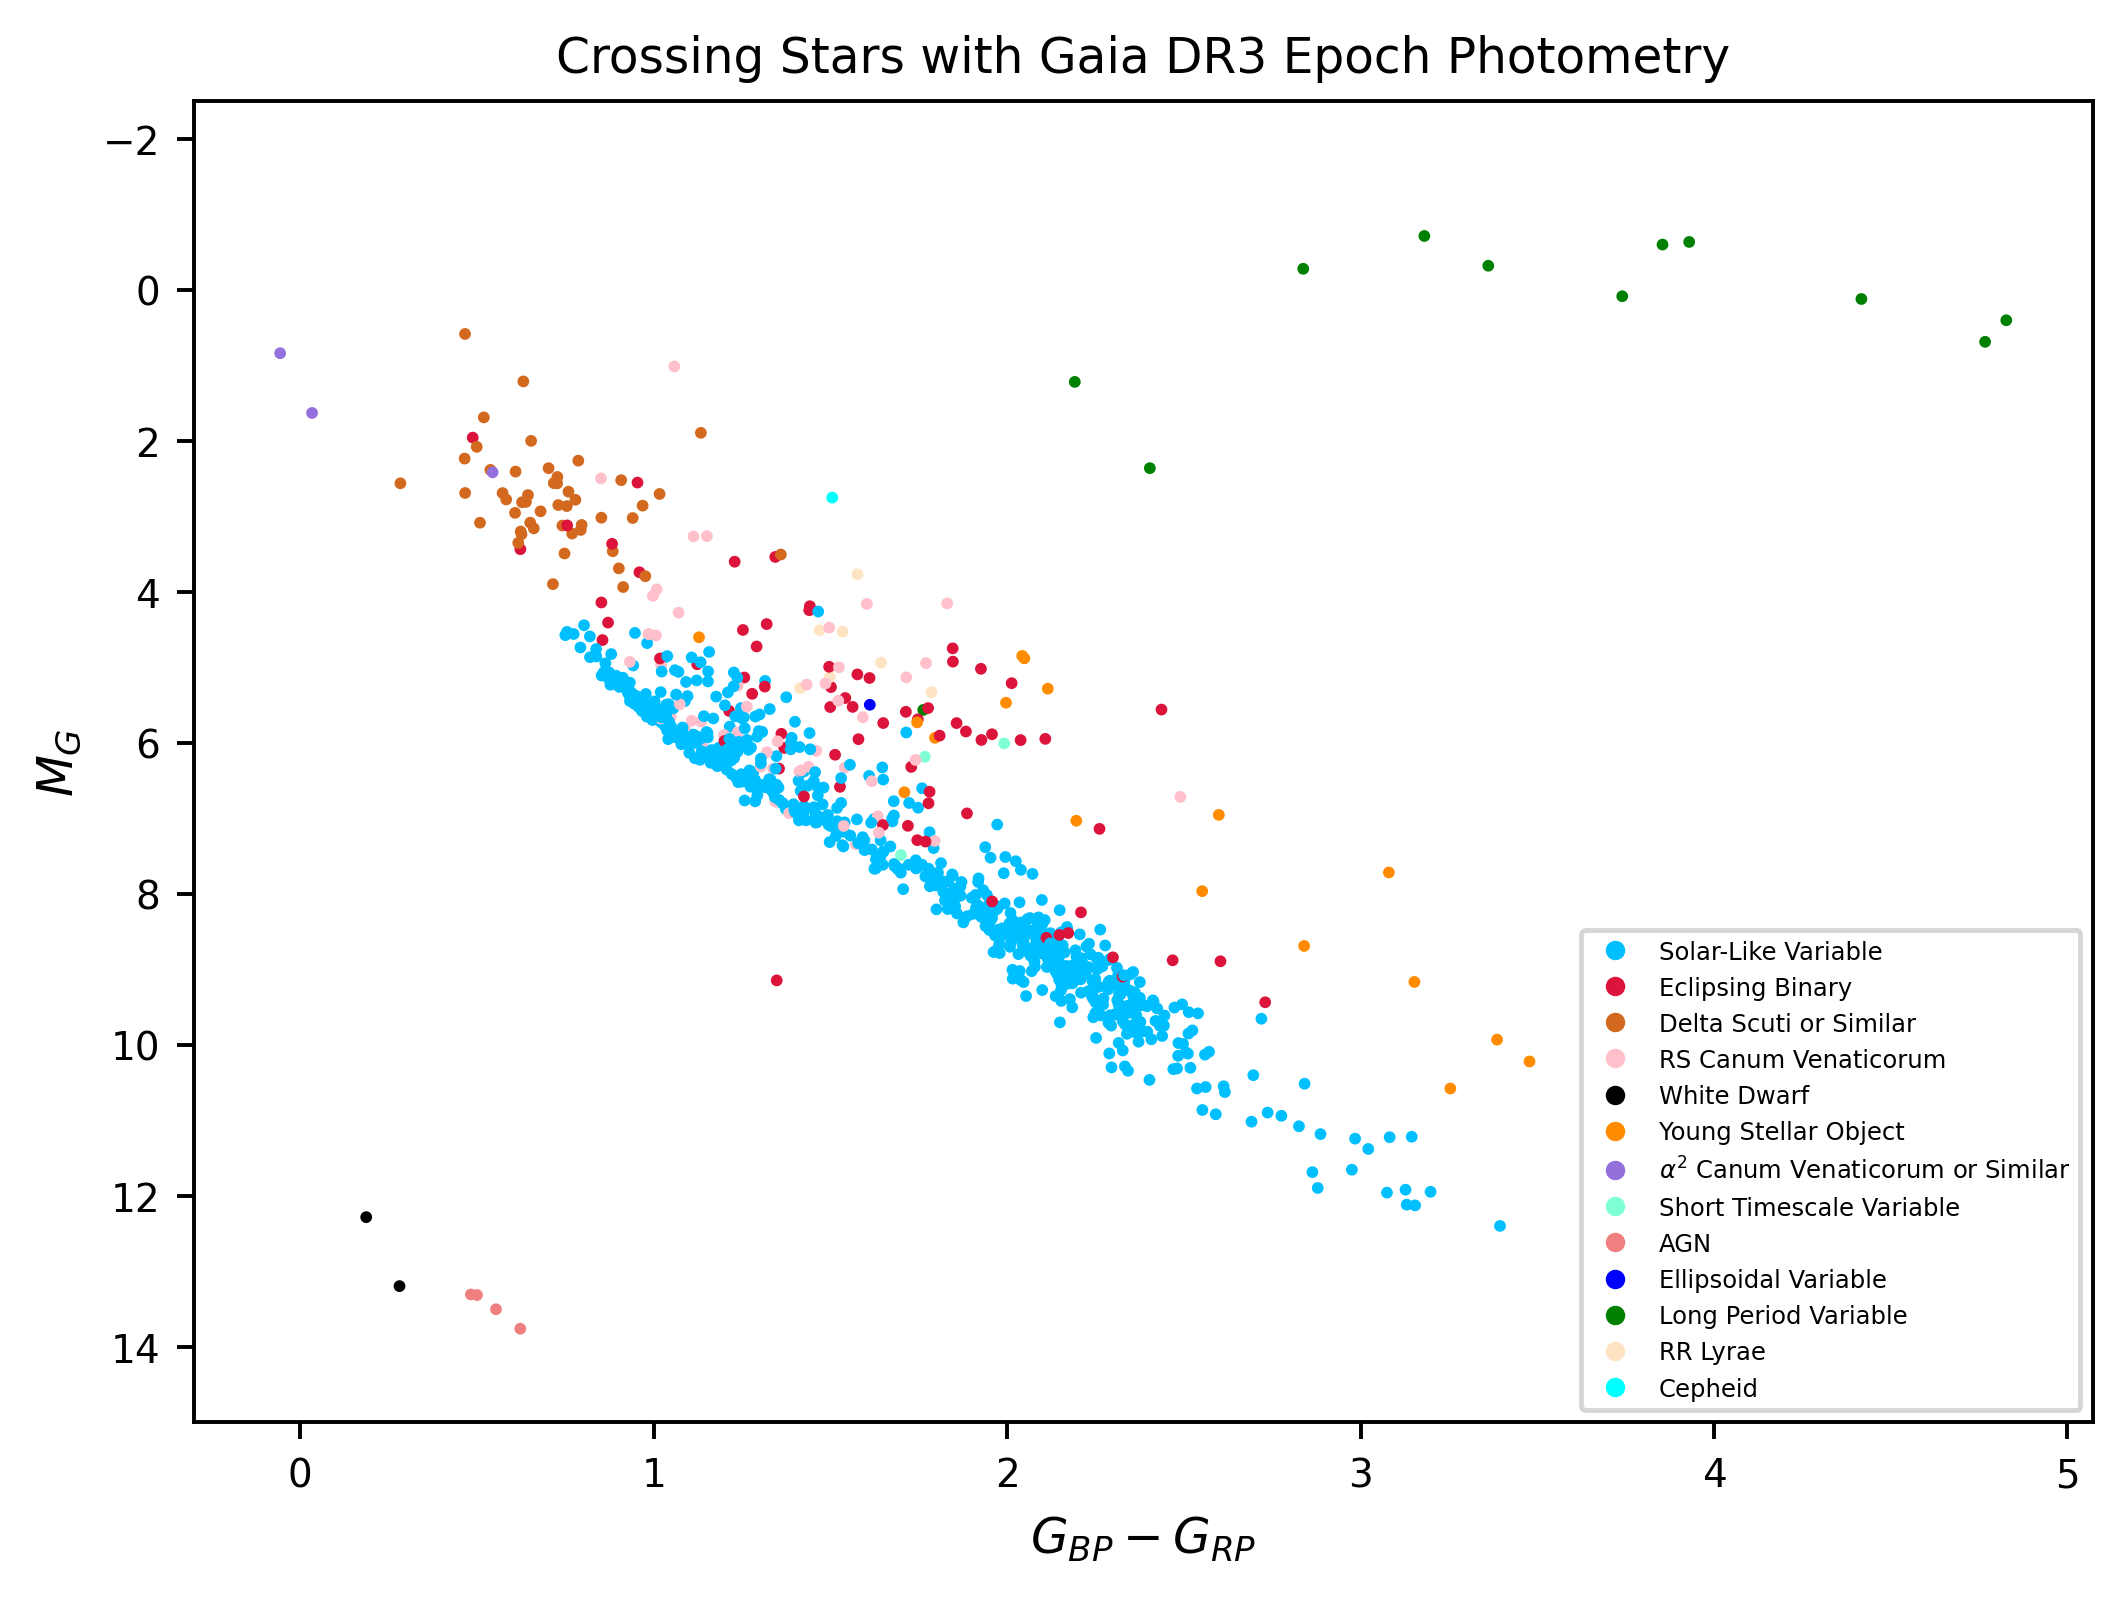

In [34]:
import matplotlib.patches as mpatches

plt.figure(dpi=350,figsize=(7,5))

plt.scatter(brcol.value, absmag.value, s=2, c=[ class_colors[i] for i in classes ])
plt.ylim(15, -2.5)
plt.title('Crossing Stars with Gaia DR3 Epoch Photometry', fontsize=10)
plt.xlabel('$G_{BP} - G_{RP}$', fontsize=10)
plt.ylabel('$M_G$', fontsize=10)


plt.tick_params(axis='both', which='major', labelsize=8)
fake_handles = [mpatches.Patch(color=item) for item in class_colors_label.values()]
label = class_colors_label.keys()
plt.legend(list(zip(list_color,list_mak)), list_lab, 
          handler_map={tuple:MarkerHandler()}, prop={'size':5})
#plt.legend(list(zip(class_colors_label.values(),['.']*13)), label, loc='best', prop={'size': 5})

plt.savefig('../Figures/Gaia_CMD.pdf', dpi=500, format='pdf', bbox_inches='tight')

## Eclipsing Binaries

In [35]:
lcClasses[lcClasses['best_class_name'] == 'ECL']

best_class_name,source_id
bytes26,int64
ECL,154152938964458880
ECL,155663221263488640
ECL,156210812416751872
ECL,180221367523856000
ECL,427743592670199680
ECL,429666535431949952
ECL,429690518529824128
ECL,430242301563244288
ECL,430375479908785024


Pick a desired source ID

In [227]:
lcID = 5516293374647532928
id_mask = stars_x['id'] == lcID
xtime = stars_x[id_mask]['xtime'][0].value

In [228]:
stars_x[id_mask]

id,ra,dec,dist,dist84,dist16,x,y,z,g,bp,rp,class,xtime,seto
,deg,deg,pc,pc,pc,pc,pc,pc,mag,mag,mag,,,
int64,float64,float64,float32,float32,float32,float64,float64,float64,float32,float32,float32,bytes30,object,bool
5516293374647532928,123.781717329243,-47.21491917970082,75.36312,75.45837,75.27603,-8.836275666905749,-74.30564589156373,-8.92859646491453,13.82077,15.257887,12.527579,ECL,2457294.3686785023,False


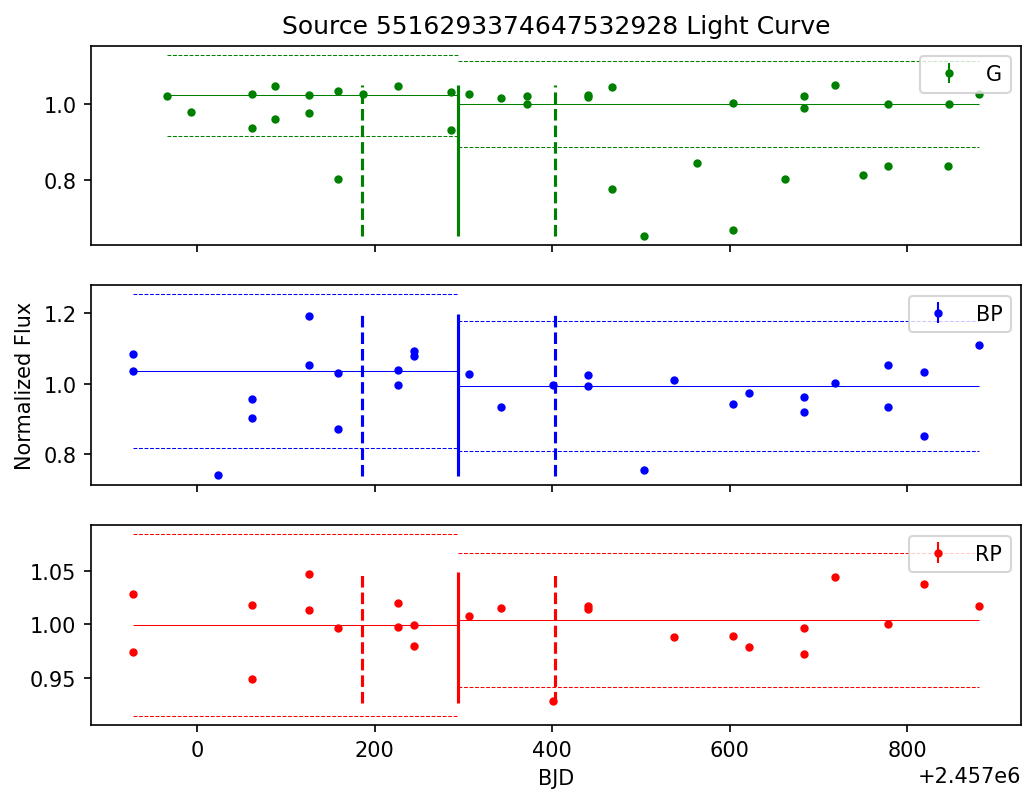

In [229]:
lightCurve.plotLC(str(lcID), c1_x[id_mask], stars_x[id_mask], glcDict, bplcDict, rplcDict, y='flux', time=xtime)
plt.savefig('../Figures/Sample_LC.pdf', dpi=500, format='pdf', bbox_inches='tight')

Get the the light curve information

In [86]:
lcDict = glcDict # choose g, bp, or rp light curve

lcTimes = Time(lcDict[str(lcID)]['time'].value + 2455197.5, format='jd')
lcFlux = lcDict[str(lcID)]['flux']
lcFerr = lcDict[str(lcID)]['flux_error']
lcMag = lcDict[str(lcID)]['mag']
# time offset described at https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_photometry/ssec_dm_epoch_photometry.html

#### Plot with crossing time

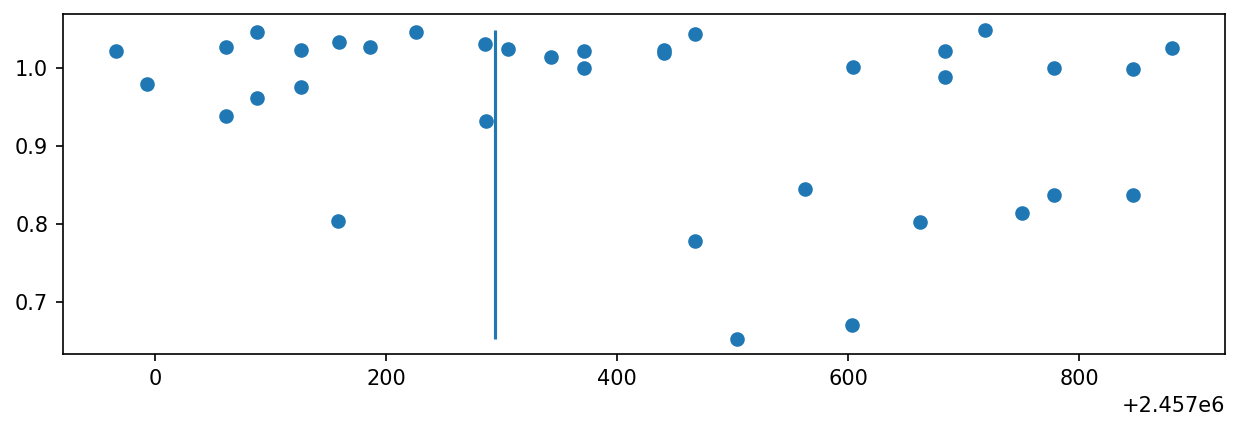

In [87]:
plt.figure(figsize=[10,3], dpi=150)

plt.vlines(xtime, ymin=min(lcFlux.value), ymax=max(lcFlux.value))
plt.scatter(lcTimes.value, lcFlux)

In [88]:
lcTS = TimeSeries(time = lcTimes, data={'flux' : lcFlux/np.median(lcFlux), 'flux_error' : lcFerr/np.median(lcFlux)})

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Text(0, 0.5, 'Power')

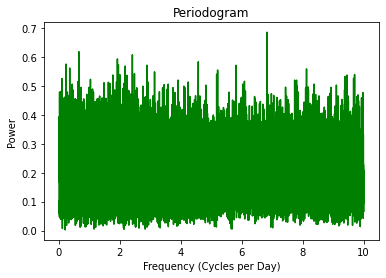

In [89]:
freqs = np.linspace(0.01/u.d, 10/u.d, 100000)
power = LombScargle(lcTS.time, lcTS['flux'], lcTS['flux_error']).power(freqs)
best_freq = freqs[np.argmax(power)]

plt.plot(freqs, power, color='g')
plt.title('Periodogram')
plt.xlabel('Frequency (Cycles per Day)')
plt.ylabel('Power')

We use double the period because we are trying to fit a double gaussian

In [90]:
lcTS_folded = lcTS.fold(period=2./best_freq, normalize_phase=True, epoch_time=lcTS.time[np.argmax(lcTS['flux'])])

Text(0, 0.5, 'Normalized Flux')

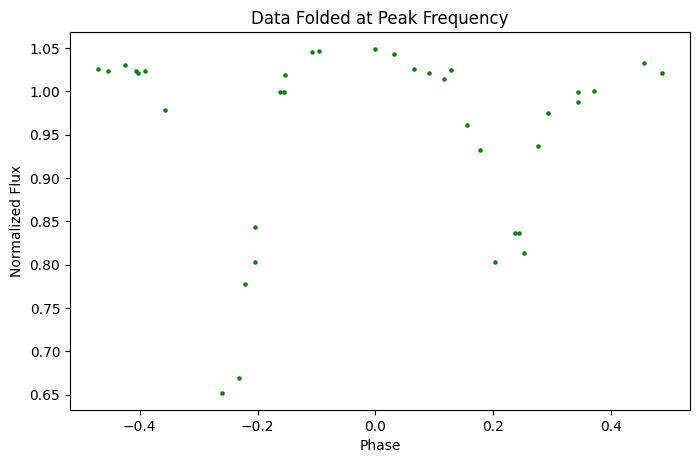

In [91]:
fig = plt.figure(figsize=(8,5), dpi=100)

plt.scatter(lcTS_folded['time'], lcTS_folded['flux'], c = 'g', s=5)
plt.title('Data Folded at Peak Frequency')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')

In [92]:
from scipy.optimize import curve_fit

In [93]:
def negDoubleGaussian(x, mu1, sig1, d1, mu2, sig2, d2, b):
    g1 = d1*np.exp(-np.power(x - mu1, 2.) / (2 * np.power(sig1, 2.)))
    g2 = d2*np.exp(-np.power(x - mu2, 2.) / (2 * np.power(sig2, 2.)))
    ndg = -g1 - g2 + b
    return ndg

In [94]:
p0 = np.array([-0.25, 0.1, 0.2, 0.25, 0.1, 0.2, 1.11])
p1, cov1 = curve_fit(negDoubleGaussian, lcTS_folded['time'].value, lcTS_folded['flux'].value, p0, maxfev=10000)

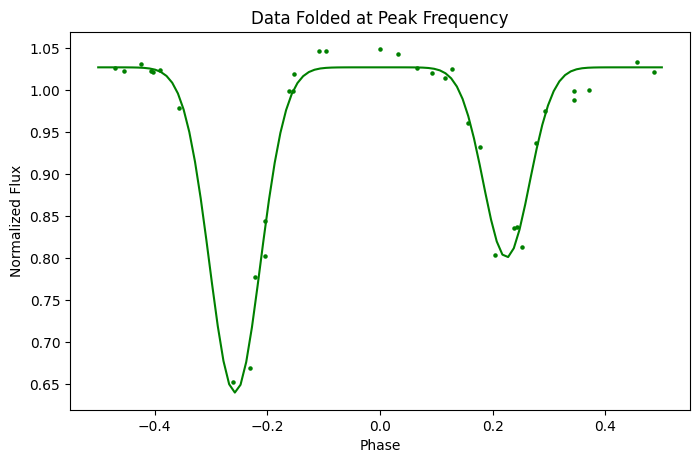

In [95]:
fig = plt.figure(figsize=(8,5), dpi=100)

plt.scatter(lcTS_folded['time'], lcTS_folded['flux'], c = 'g', s=5)
plt.title('Data Folded at Peak Frequency')
plt.xlabel('Phase')
plt.ylabel('Normalized Flux')

xs = np.linspace(-0.5, 0.5, 100)
plt.plot(xs, negDoubleGaussian(xs, p1[0], p1[1], p1[2], p1[3], p1[4], p1[5], p1[6]), c='g')

### Compare Before and After

In [96]:
right_mask = lcTimes.value >= xtime
left_mask = lcTimes.value <= xtime

In [97]:
lcTS_right = TimeSeries(time = lcTimes[right_mask], data={'flux' : lcFlux[right_mask]/np.median(lcFlux[right_mask]), 'flux_error' : lcFerr[right_mask]/np.median(lcFlux[right_mask])})
lcTS_left = TimeSeries(time = lcTimes[left_mask], data={'flux' : lcFlux[left_mask]/np.median(lcFlux[left_mask]), 'flux_error' : lcFerr[left_mask]/np.median(lcFlux[left_mask])})

Text(0, 0.5, 'Power')

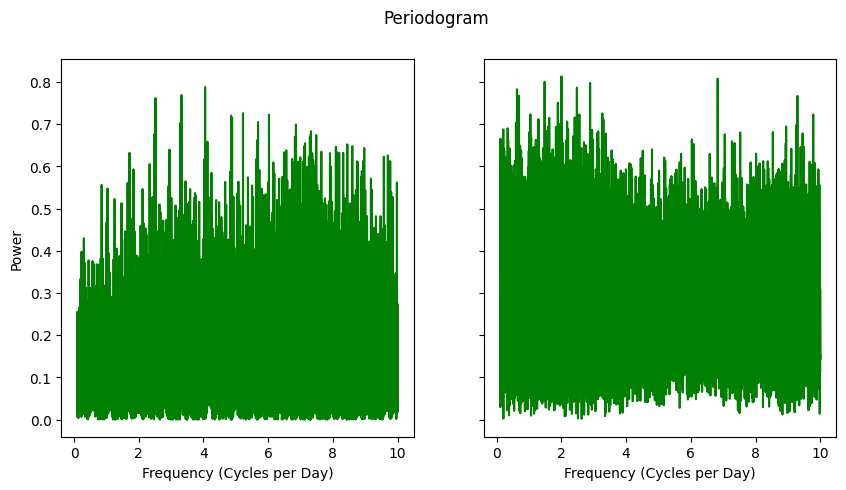

In [98]:
freqs = np.linspace(0.1/u.d, 10/u.d, 250000)
power_right = LombScargle(lcTS_right.time, lcTS_right['flux'], lcTS_right['flux_error']).power(freqs)
power_left = LombScargle(lcTS_left.time, lcTS_left['flux'], lcTS_left['flux_error']).power(freqs)

best_freq_right = freqs[np.argmax(power_right)]
best_freq_left = freqs[np.argmax(power_left)]

fig, ax = plt.subplots(1,2, figsize=[10,5], dpi=100, sharey=True)

ax[0].plot(freqs, power_left, color='g')
ax[1].plot(freqs, power_right, color='g')
fig.suptitle('Periodogram')
ax[0].set_xlabel('Frequency (Cycles per Day)')
ax[1].set_xlabel('Frequency (Cycles per Day)')
ax[0].set_ylabel('Power')

In [99]:
lcTS_folded_right = lcTS_right.fold(period=2./best_freq_right, normalize_phase=True, epoch_time=lcTS_left['time'][np.where(lcTS_left['flux']==np.max(lcTS_left['flux']))[0][0]])
lcTS_folded_left = lcTS_left.fold(period=2./best_freq_left, normalize_phase=True, epoch_time=lcTS_left['time'][np.where(lcTS_left['flux']==np.max(lcTS_left['flux']))[0][0]])

Text(0, 0.5, 'Normalized Flux')

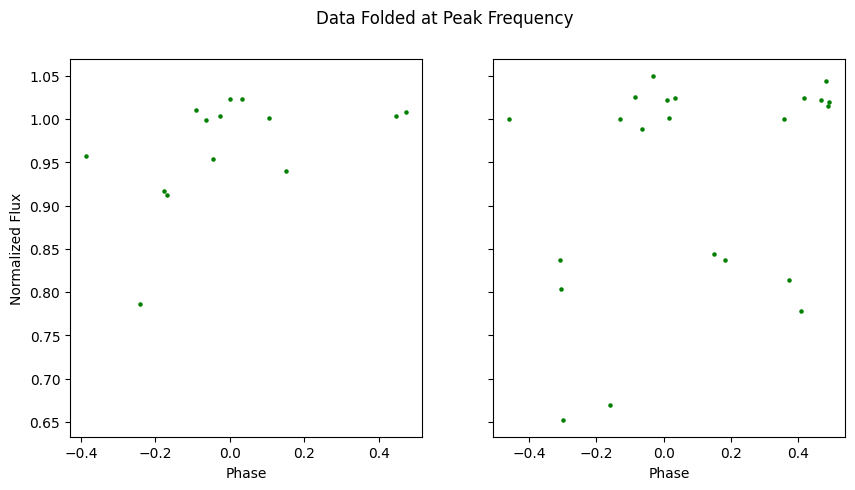

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100, sharey=True)

ax[0].scatter(lcTS_folded_left['time'], lcTS_folded_left['flux'], c = 'g', s=5)
ax[1].scatter(lcTS_folded_right['time'], lcTS_folded_right['flux'], c = 'g', s=5)
fig.suptitle('Data Folded at Peak Frequency')
ax[0].set_xlabel('Phase')
ax[1].set_xlabel('Phase')
ax[0].set_ylabel('Normalized Flux')

In [101]:
print(f'Left Period: {2./best_freq_left}')
print(f'Right Period: {2./best_freq_right}')

Left Period: 0.493653759346384 d
Right Period: 1.0003685372432691 d


In [102]:
best_freq_left/2

<Quantity 2.0257113 1 / d>

`lightCurve.py` has a function to fit a double Gaussian

In [111]:
x = lightCurve.fitDoubleGaussian(lcTS_left, best_freq_left, lcTS_left['time'][np.where(lcTS_left['flux']==np.max(lcTS_left['flux']))[0][0]])

In [117]:
pLeft, lcTS_folded_left, covLeft= lightCurve.fitDoubleGaussian(lcTS_left, best_freq_left, lcTS_left['time'][np.where(lcTS_left['flux']==np.max(lcTS_left['flux']))[0][0]])
pRight, lcTS_folded_right, covRight = lightCurve.fitDoubleGaussian(lcTS_right, best_freq_right, lcTS_left['time'][np.where(lcTS_left['flux']==np.max(lcTS_left['flux']))[0][0]])

Text(0, 0.5, 'Normalized Flux')

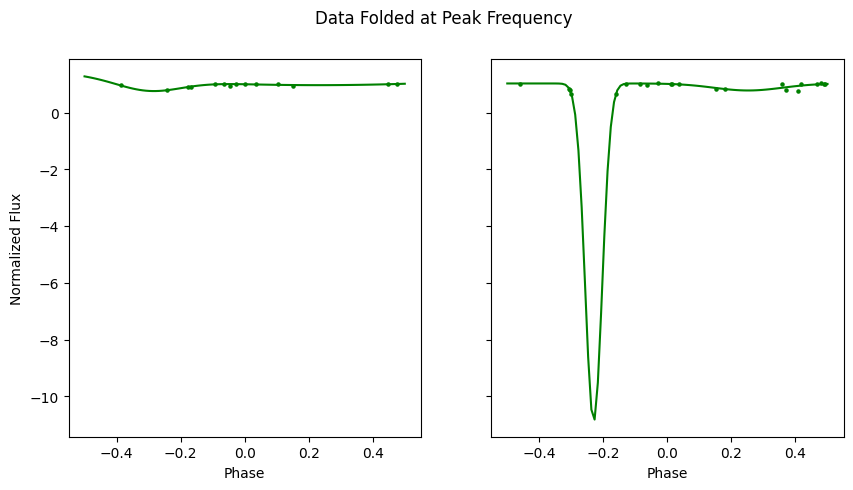

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100, sharey=True)

ax[0].scatter(lcTS_folded_left['time'], lcTS_folded_left['flux'], c = 'g', s=5)
ax[1].scatter(lcTS_folded_right['time'], lcTS_folded_right['flux'], c = 'g', s=5)

ax[0].plot(xs, negDoubleGaussian(xs, pLeft[0], pLeft[1], pLeft[2], pLeft[3], pLeft[4], pLeft[5], pLeft[6]), c='g')
ax[1].plot(xs, negDoubleGaussian(xs, pRight[0], pRight[1], pRight[2], pRight[3], pRight[4], pRight[5], pRight[6]), c='g')

fig.suptitle('Data Folded at Peak Frequency')
ax[0].set_xlabel('Phase')
ax[1].set_xlabel('Phase')
ax[0].set_ylabel('Normalized Flux')

### Produce periodograms for all 217 stars

In [119]:
set(lcClasses['best_class_name'])

{'ACV|CP|MCP|ROAM|ROAP|SXARI',
 'AGN',
 'CEP',
 'DSCT|GDOR|SXPHE',
 'ECL',
 'ELL',
 'LPV',
 'RR',
 'RS',
 'S',
 'SOLAR_LIKE',
 'WD',
 'YSO'}

In [ ]:
for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    try:
        lightCurve.comparePeriodPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], save=True, savefolder='Periodograms/ECL')
    except:
        print(lcID)

In [301]:
for row in lcClasses[lcClasses['best_class_name'] == 'SOLAR_LIKE']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    try:
        lightCurve.comparePeriodPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], save=True, savefolder='Periodograms/Solar')
    except:
        print(lcID)

3177407910705445888
4858215766828595968
4873746132349363328
5125414998097353600
5152365363828101632
5330165258852192896
5366183335638901888
5407414407508441856
5544523919794889088
5878380317661078912


In [298]:
for row in lcClasses[lcClasses['best_class_name'] == 'DSCT|GDOR|SXPHE']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    try:
        lightCurve.comparePeriodPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], save=True, savefolder='Periodograms/DSCT')
    except:
        print(lcID)

In [299]:
for row in lcClasses[lcClasses['best_class_name'] == 'RS']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    try:
        lightCurve.comparePeriodPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], save=True, savefolder='Periodograms/RS')
    except:
        print(lcID)

5811866422581688320


In [300]:
for row in lcClasses[lcClasses['best_class_name'] == 'WD']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    try:
        lightCurve.comparePeriodPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], save=True, savefolder='Periodograms/WD')
    except:
        print(lcID)

5620763437599189376
6462911897617050240


### For Eclipsing Binaries, compare other parameters

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Left Median: 1.000, Right Median: 1.000
Left Freq: 7.150, Right Freq: 5.938
Left Depth 1: 0.255, Right Depth 1: 0.164
Left Depth 2: 0.231, Right Depth 2: 0.154
Left Phase 1: -0.289, Right Phase 1: -0.295
Left Phase 2: 0.232, Right Phase 2: 0.216


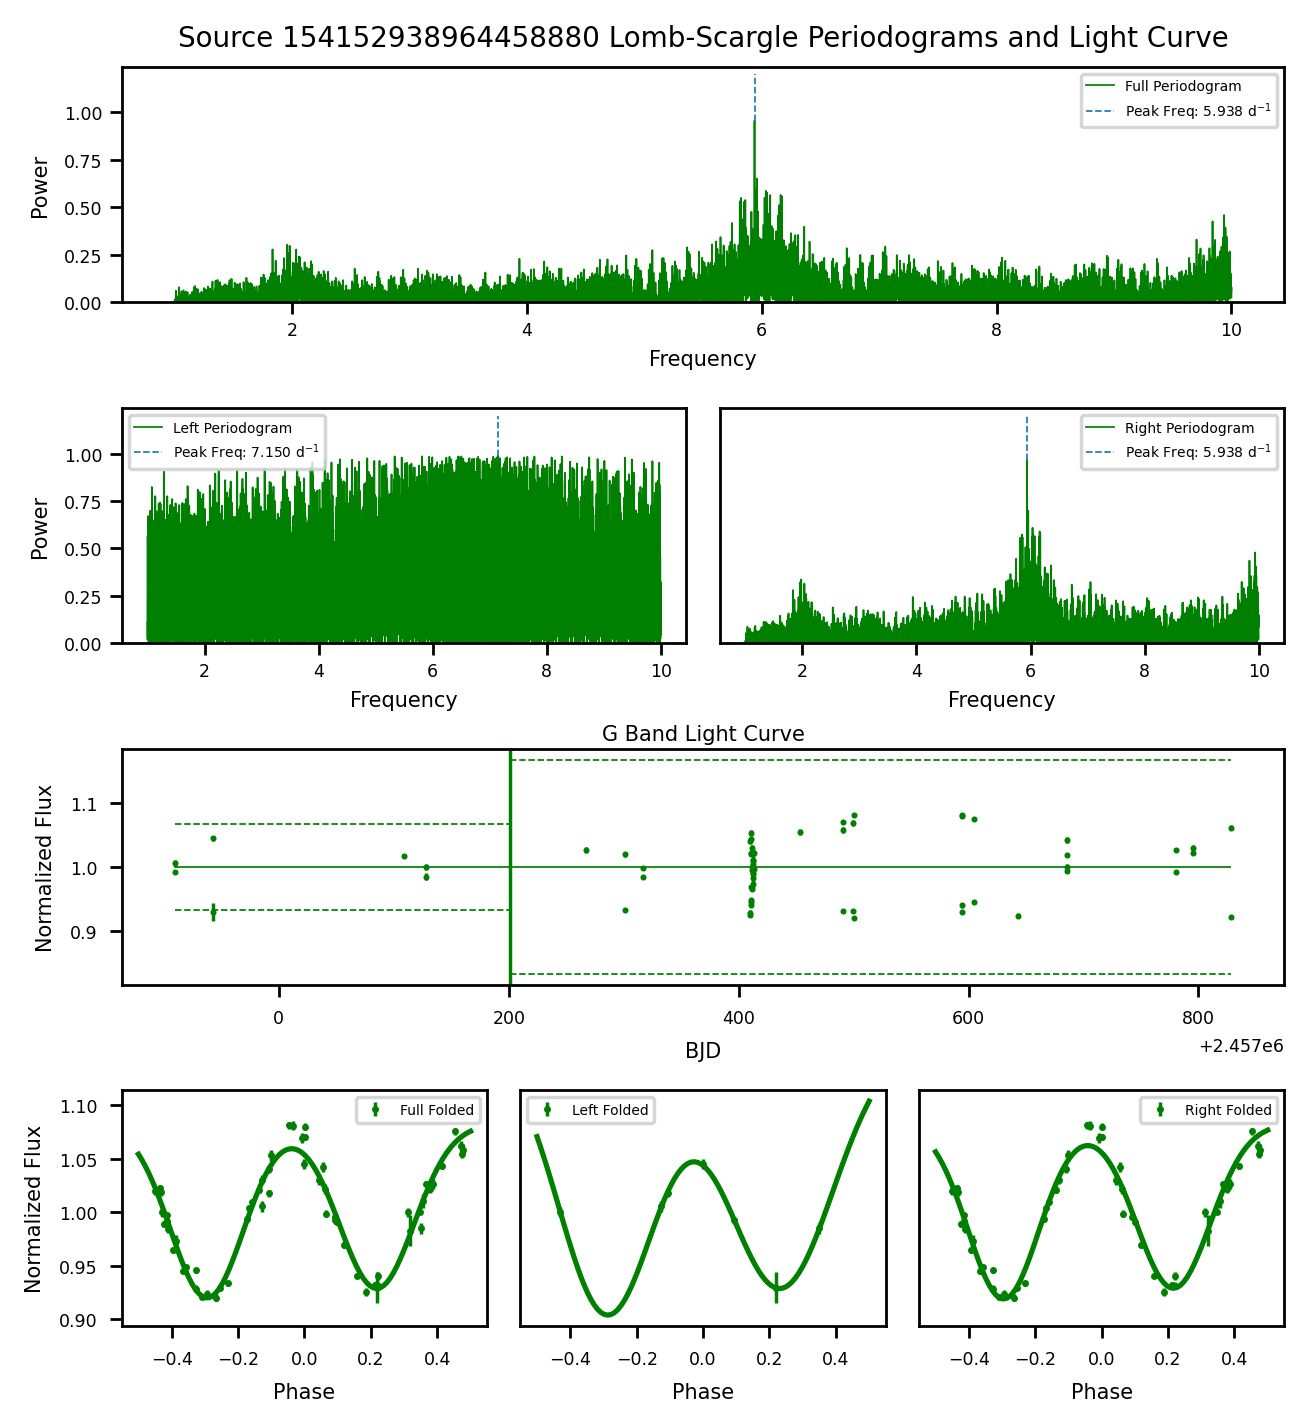

In [147]:
for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    xtime = stars_x[id_mask]['xtime'][0].value
    try:
        if stars_x[id_mask]['seto']==False:
            lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=1, max_freq=10, save=False, ecl=True, time=xtime)
        else:
            lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=1, max_freq=10, save=False, ecl=True, time=xtime, err=False)
        break
    except Exception as e:
        print(e)

In [148]:
num = 0
parameters = ['phase1', 'sigma1', 'amplitude1', 'phase2', 'sigma2', 'amplitude2', 'baseline', 'median', 'frequency']

testDiffs = None

for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    xtime = stars_x[id_mask]['xtime'][0].value
    
    try:
        pRight, pLeft, sigRight, sigLeft = lightCurve.eclParameters(glcDict, lcID, c1_x[id_mask], min_freq=0.05, max_freq=10, time=xtime)
        errorDiffs = np.abs(pRight - pLeft)/np.sqrt(sigRight**2 + sigLeft**2)
        eDiffTable = Table(dict(zip(parameters, np.reshape(errorDiffs, (9,1)))))
        eDiffTable = hstack([Table({'id' : [int(lcID)]}), eDiffTable])
        if testDiffs == None:
            testDiffs = eDiffTable
        else:
            testDiffs = vstack([testDiffs, eDiffTable])
    
    except Exception as e:
        print(e)
        print(lcID)

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/pyt

zero-size array to reduction operation minimum which has no identity
156210812416751872
The number of func parameters=7 must not exceed the number of data points=2
180221367523856000


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


index 0 is out of bounds for axis 0 with size 0
429666535431949952


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


The number of func parameters=7 must not exceed the number of data points=6
430242301563244288


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
../lightCurve.py:628: RuntimeWarning: invalid value encountered in sqrt
  sigmaRight = np.sqrt(np.diag(covRight))
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/cor

The number of func parameters=7 must not exceed the number of data points=3
523814250083922176
The number of func parameters=7 must not exceed the number of data points=6
523823213677397888


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
../lightCurve.py:628: RuntimeWarning: invalid value encountered in sqrt
  sigmaRight = np.sqrt(np.diag(covRight))
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar 

The number of func parameters=7 must not exceed the number of data points=6
3340795677894423296
The number of func parameters=7 must not exceed the number of data points=5
3345430772240949504
index 0 is out of bounds for axis 0 with size 0
3345463658807819136


../lightCurve.py:629: RuntimeWarning: invalid value encountered in sqrt
  sigmaLeft = np.sqrt(np.diag(covLeft))
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/_statistics.py:251: RuntimeWarning: invalid value encountered in double_scalars
  * np.sqrt(0.5 * NH * Z))


zero-size array to reduction operation minimum which has no identity
3345569761679611776


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

The number of func parameters=7 must not exceed the number of data points=6
3392962213233232128
index 0 is out of bounds for axis 0 with size 0
3412035995490753920


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in subtract
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


cannot convert float NaN to integer
3413648532371985920


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

zero-size array to reduction operation minimum which has no identity
3426941387435550464


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


The number of func parameters=7 must not exceed the number of data points=5
3427141597334719744
The number of func parameters=7 must not exceed the number of data points=4
3427213069888171520


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/

The number of func parameters=7 must not exceed the number of data points=6
3447201057408816128


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


The number of func parameters=7 must not exceed the number of data points=5
3754670894179149568


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

The number of func parameters=7 must not exceed the number of data points=6
4114779472186478080


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in subtract
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


cannot convert float NaN to integer
4117463685044525568


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


index 0 is out of bounds for axis 0 with size 0
4117606385311276160


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

The number of func parameters=7 must not exceed the number of data points=4
4118103467763742848
zero-size array to reduction operation minimum which has no identity
4118108587365108096


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


The number of func parameters=7 must not exceed the number of data points=4
4118317494475995008


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/_statistics.py:251: RuntimeWarning: invalid value encountered in double_scalars
  * np.sqrt(0.5 * NH * Z))


The number of func parameters=7 must not exceed the number of data points=3
4118392325654328064


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


zero-size array to reduction operation minimum which has no identity
4121222021922749312


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

The number of func parameters=7 must not exceed the number of data points=3
4121394924410554496


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

The number of func parameters=7 must not exceed the number of data points=4
5484930007318479360


../lightCurve.py:629: RuntimeWarning: invalid value encountered in sqrt
  sigmaLeft = np.sqrt(np.diag(covLeft))
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/

In [149]:
testDiffs

id,phase1,sigma1,amplitude1,phase2,sigma2,amplitude2,baseline,median,frequency
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
154152938964458880,0.009399509442243653,0.03845949322354288,0.09381680029295998,0.018489357798579565,0.048087178784126335,0.0779899989889056,0.07806102893802604,0.0005931893816703989,20.72098239775659
155663221263488640,0.09983330824698192,0.003961986155548404,0.2696010957798118,0.13460451912689,0.028920284914084243,0.41183413175697087,0.022433084477986445,0.175235963155517,0.07999864955155157
427743592670199680,0.2176017711619517,0.20728196816365968,0.23737729399464758,0.7221661131653021,0.29594469883000496,0.22419691760795205,1.550984890573508,0.3717978283260235,333.49605222500986
429690518529824128,2.176428519546237,0.9027831163123151,0.32619578392138154,0.11922300133046827,1.10259027271456,0.7479442298458601,1.2292720229089427,0.2997048094389758,6112543.994552191
430375479908785024,0.8336426548405855,0.6964118575832264,0.041424285994979736,0.007319448084673817,0.25805993948252054,0.31326314654238574,0.21284837505327323,0.3427914104363122,203.11346216271028
523785456627309952,3.724007826678564e-06,3.567129574578891e-07,7.057083882310657e-08,1.528458183996123e-05,6.508069305239448e-08,nan,1.2863827489375292,0.0862778263995955,0.49333855272552785
527903505623063552,0.3262420363281633,0.04602260700813132,0.5349733898868848,nan,0.4157179789377855,6.876338870052674e-08,0.5674287105027378,0.1611741435455593,49.73231211617204
528471231579337472,3.5809942239914614,1.0701506094928521,1.100159885315936,1.273682100148581,25.990373354224623,1.3203767599622223,0.7592326753971328,0.11594553801681098,2.3643538629179246
3340383704631031552,0.44933502818615784,1.6869254754495115,0.010899928822564242,1.104616069003239,1.112432443455468,1.3616209929463752,1.073364519776967,0.25170950900916716,10171.904089202097


In [150]:
for x in testDiffs.colnames:
    for y in range(len(testDiffs)):
        if np.isnan(testDiffs[x][y]):
            testDiffs[x][y] = 0

In [151]:
testDiffs2 = testDiffs[testDiffs['phase1'].argsort()]
for colname in testDiffs.colnames[1:]:
    testDiffs2 = testDiffs2[testDiffs2[colname].argsort()]
    testDiffs2[colname] = (testDiffs2[colname]).argsort()

In [152]:
testDiffs2

id,phase1,sigma1,amplitude1,phase2,sigma2,amplitude2,baseline,median,frequency
int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
155663221263488640,14,5,26,21,14,28,5,17,0
4121258000908273920,15,29,11,15,24,27,4,30,1
523785456627309952,3,2,2,7,2,1,37,6,2
3444070610365980928,13,9,8,6,6,10,2,34,3
528471231579337472,41,39,37,35,44,35,30,10,4
4118393768789438848,23,21,36,32,26,42,23,39,5
3437672105529004544,20,44,43,20,9,18,44,38,6
3340446655969505664,11,4,4,22,10,12,1,28,7
4929395130250439168,39,30,38,30,35,25,39,5,8


In [153]:
sumDict = {}
for row in testDiffs2:
    rowSum = 0
    for x in row:
        rowSum += x
    rowSum -= row[0]
    sumDict[str(row[0])] = rowSum

In [154]:
sumDict

{'155663221263488640': 130,
 '4121258000908273920': 156,
 '523785456627309952': 62,
 '3444070610365980928': 91,
 '528471231579337472': 275,
 '4118393768789438848': 247,
 '3437672105529004544': 242,
 '3340446655969505664': 99,
 '4929395130250439168': 249,
 '4118392291320494976': 116,
 '3443821296105153920': 80,
 '154152938964458880': 99,
 '4111706268501864576': 165,
 '4785503589711841280': 218,
 '4118004374257029248': 182,
 '3447917286154247424': 181,
 '3425556586900263424': 209,
 '3387804369827311104': 233,
 '527903505623063552': 163,
 '5516293374647532928': 90,
 '4121257962189962880': 290,
 '3436334687071336704': 128,
 '4118060036982323072': 124,
 '4118299348197473280': 160,
 '430375479908785024': 212,
 '3425568647166341888': 170,
 '427743592670199680': 242,
 '3425869324942916352': 190,
 '3427137371086627840': 168,
 '4117560751302251264': 272,
 '4111775778239123584': 192,
 '3389035620987688448': 265,
 '4118005267510520704': 209,
 '3340446449811103616': 312,
 '3340383704631031552': 266

In [155]:
sumDict = dict(sorted(sumDict.items(), key=lambda item: item[1]))

In [156]:
interest = list(sumDict.values())

In [157]:
interest /= np.max(interest)

In [158]:
interest

array([0.18397626, 0.23738872, 0.26706231, 0.27002967, 0.28189911,
       0.29376855, 0.29376855, 0.34421365, 0.36795252, 0.37982196,
       0.38575668, 0.46290801, 0.47181009, 0.47477745, 0.48367953,
       0.48961424, 0.49851632, 0.50445104, 0.53709199, 0.54005935,
       0.56379822, 0.56973294, 0.62017804, 0.62017804, 0.62017804,
       0.62908012, 0.64688427, 0.65281899, 0.68545994, 0.69139466,
       0.71810089, 0.71810089, 0.73293769, 0.7388724 , 0.78635015,
       0.78931751, 0.80712166, 0.81602374, 0.82492582, 0.86053412,
       0.86053412, 0.86053412, 0.92581602, 0.93175074, 1.        ])

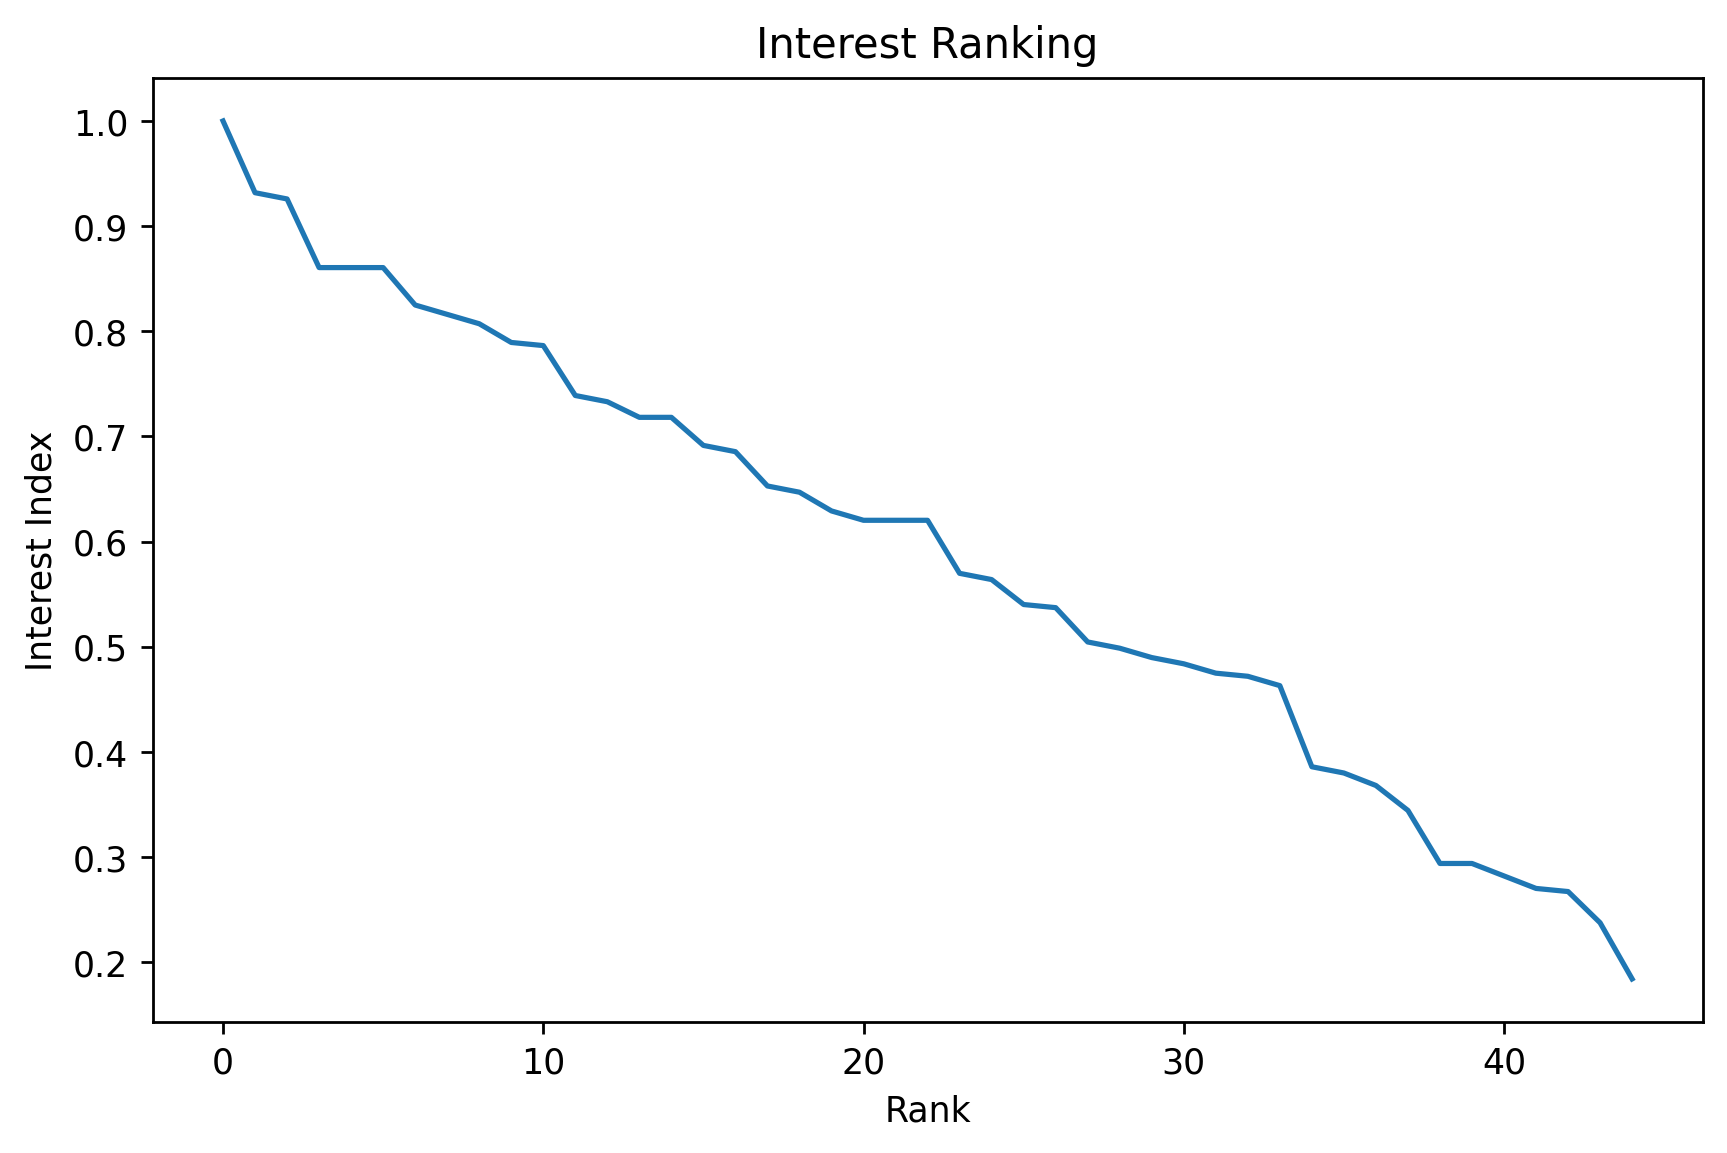

In [159]:
fig = plt.figure(figsize=(8,5), dpi=250)

plt.title('Interest Ranking')
plt.xlabel('Rank')
plt.ylabel('Interest Index')

plt.plot(interest[::-1])

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Left Median: 1.000, Right Median: 1.009
Left Freq: 4.787, Right Freq: 4.786
Left Depth 1: 0.425, Right Depth 1: 0.429
Left Depth 2: 0.389, Right Depth 2: 0.421
Left Phase 1: -0.249, Right Phase 1: -0.246
Left Phase 2: 0.252, Right Phase 2: 0.266


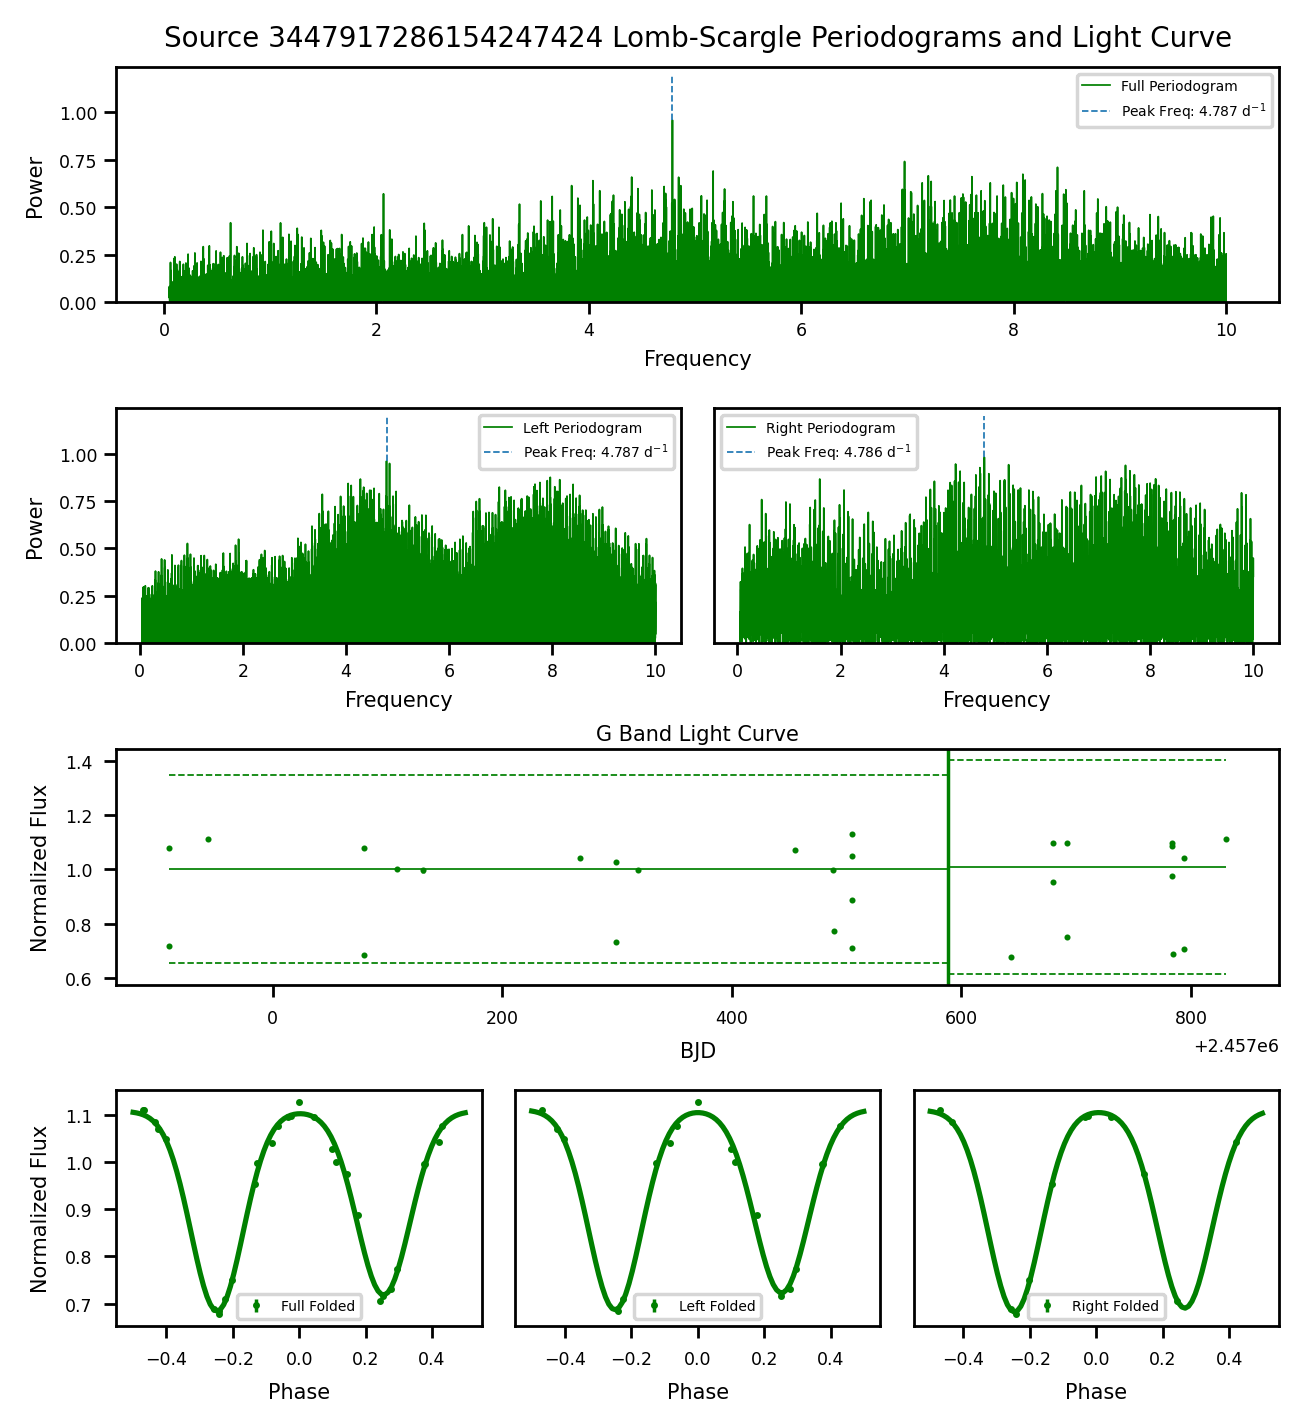

In [160]:
for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    if int(lcID) == 3447917286154247424:
        id_mask = stars_x['id'] == lcID
        xtime = stars_x[id_mask]['xtime'][0].value
        try:
            if stars_x[id_mask]['seto']==False:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime)
            else:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime, err=False)
            break
        except Exception as e:
            print(e)
            
plt.savefig('../Figures/Middle_Interesting_EB.pdf', dpi=500, format='pdf', bbox_inches='tight')

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Left Median: 1.007, Right Median: 1.000
Left Freq: 3.085, Right Freq: 3.085
Left Depth 1: 0.390, Right Depth 1: 0.408
Left Depth 2: 0.435, Right Depth 2: 0.407
Left Phase 1: -0.283, Right Phase 1: -0.266
Left Phase 2: 0.216, Right Phase 2: 0.229


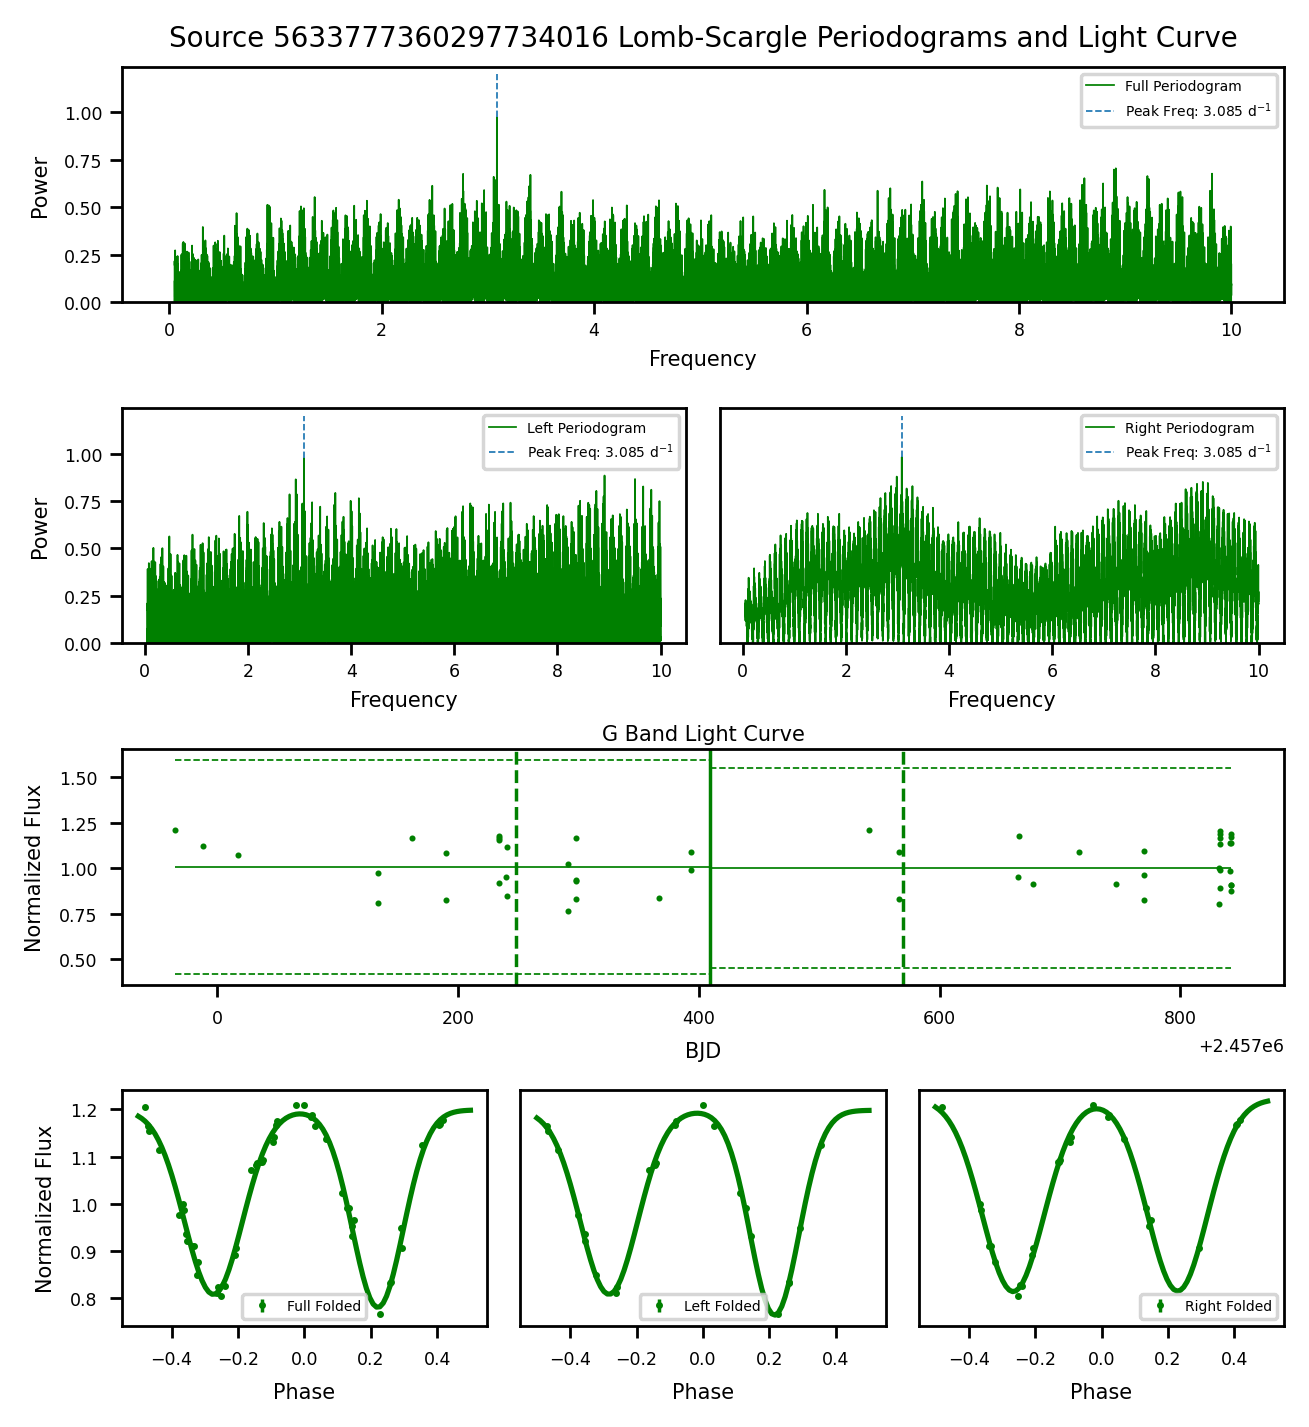

In [161]:
for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    if int(lcID) == 5633777360297734016:
        id_mask = stars_x['id'] == lcID
        xtime = stars_x[id_mask]['xtime'][0].value
        try:
            if stars_x[id_mask]['seto']==False:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime)
            else:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime, err=False)
            break
        except Exception as e:
            print(e)
            
plt.savefig('../Figures/Most_Interesting_EB.pdf', dpi=500, format='pdf', bbox_inches='tight')

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Left Median: 1.000, Right Median: 1.000
Left Freq: 0.563, Right Freq: 0.206
Left Depth 1: 0.021, Right Depth 1: -0.016
Left Depth 2: 0.310, Right Depth 2: 0.135
Left Phase 1: -0.856, Right Phase 1: -0.488
Left Phase 2: 0.178, Right Phase 2: 0.211


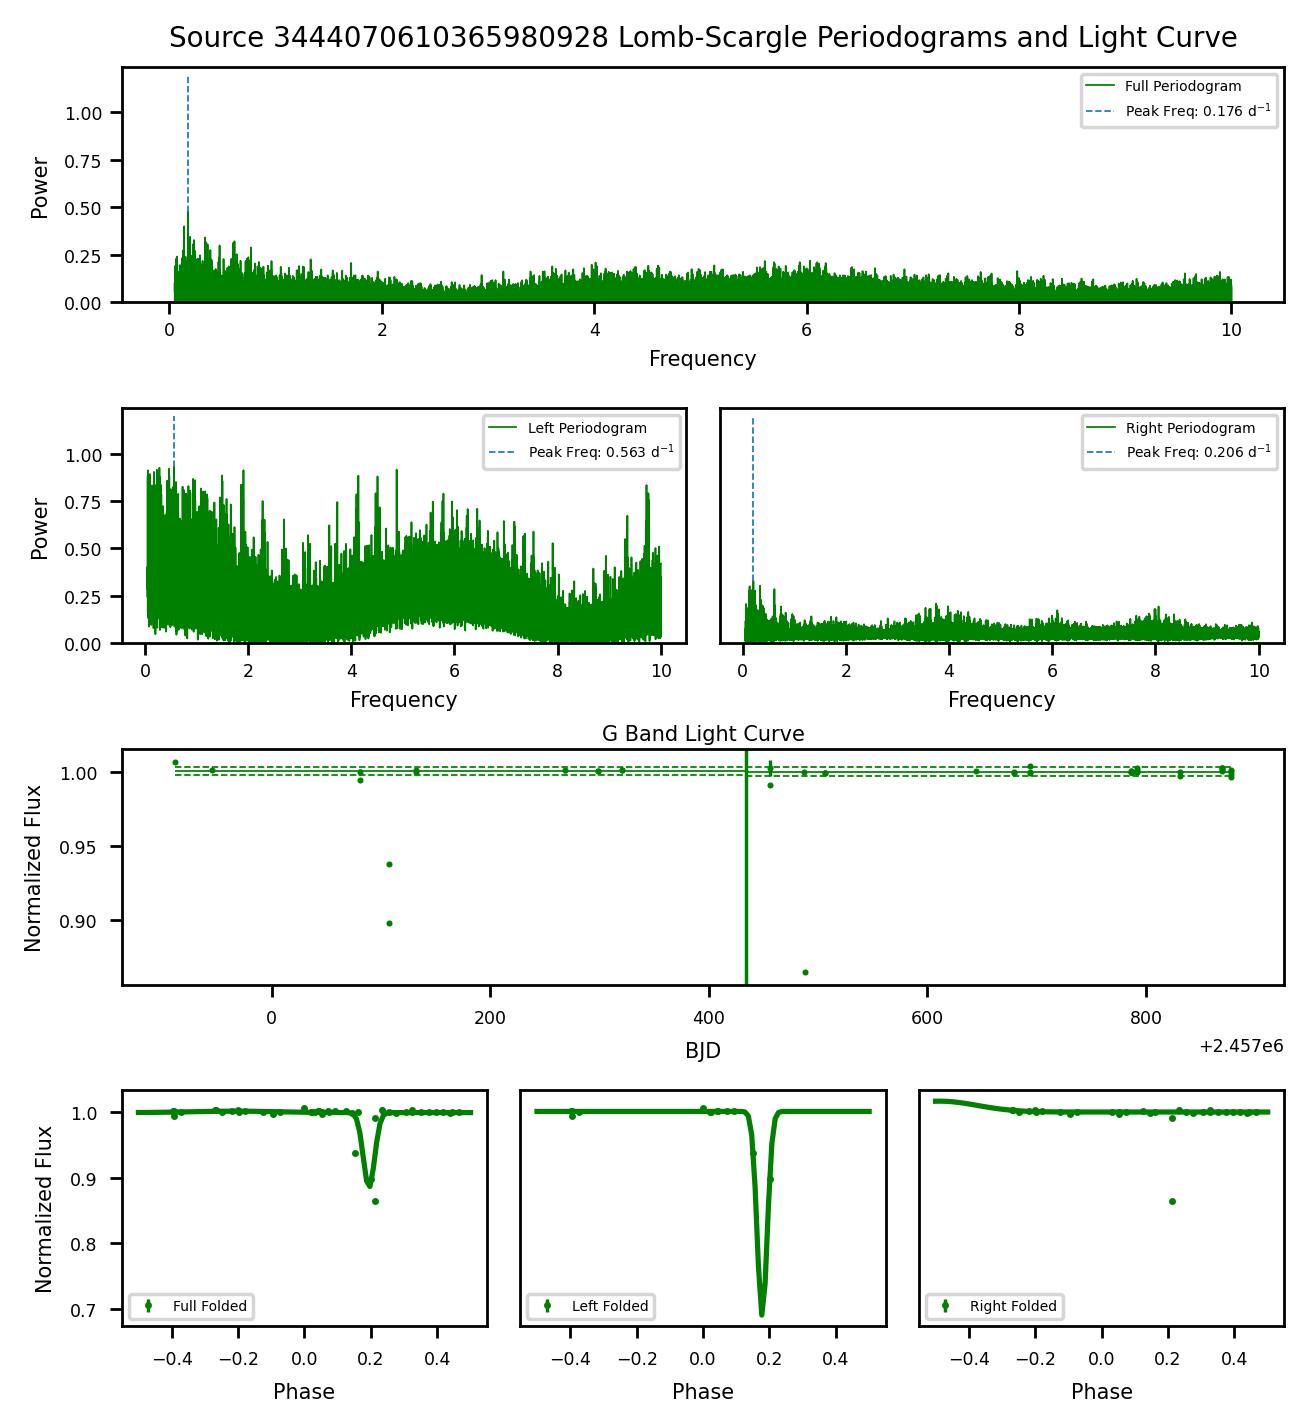

In [162]:
for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    if int(lcID) == 3444070610365980928:
        id_mask = stars_x['id'] == lcID
        xtime = stars_x[id_mask]['xtime'][0].value
        try:
            if stars_x[id_mask]['seto']==False:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime)
            else:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime, err=False)
            break
        except Exception as e:
            print(e)
            
plt.savefig('../Figures/Least_Interesting_EB1.pdf', dpi=500, format='pdf', bbox_inches='tight')

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Left Median: 0.995, Right Median: 1.001
Left Freq: 9.200, Right Freq: 0.419
Left Depth 1: 1.448, Right Depth 1: 0.290
Left Depth 2: 0.614, Right Depth 2: 0.017
Left Phase 1: -0.322, Right Phase 1: -0.400
Left Phase 2: 0.399, Right Phase 2: 0.386


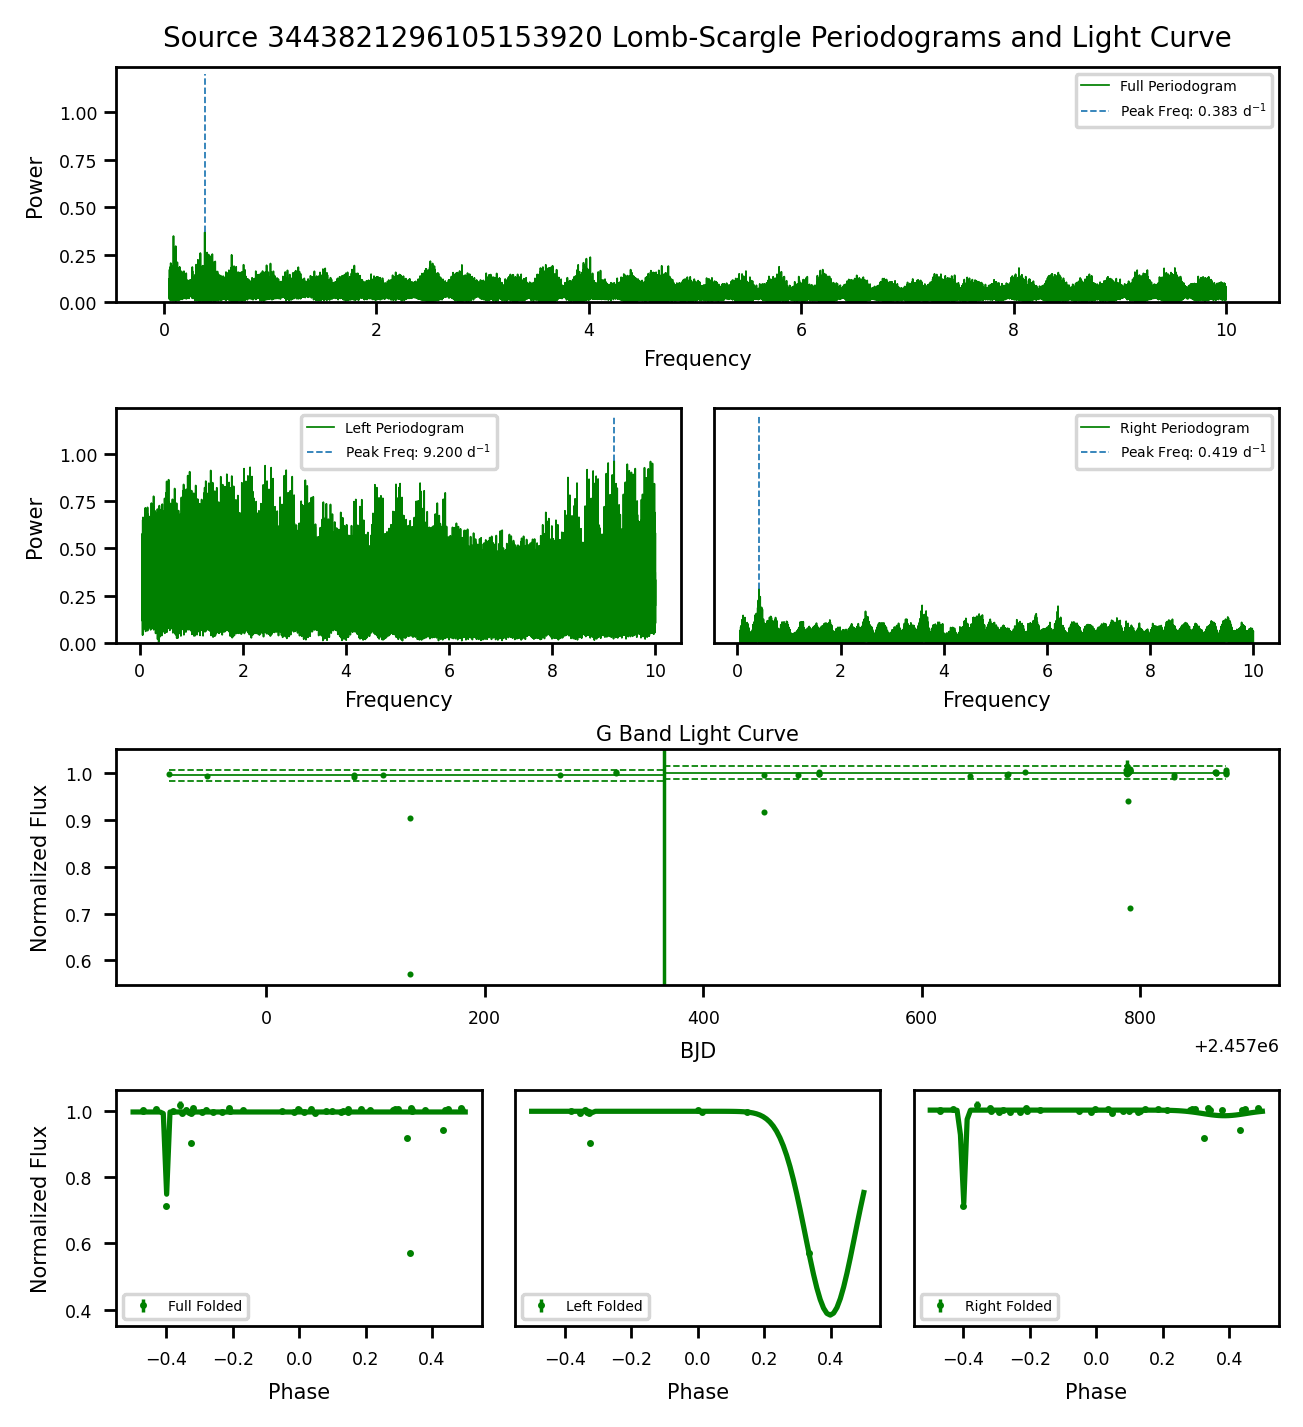

In [163]:
for row in lcClasses[lcClasses['best_class_name'] == 'ECL']:
    lcID = row['source_id']
    if int(lcID) == 3443821296105153920:
        id_mask = stars_x['id'] == lcID
        xtime = stars_x[id_mask]['xtime'][0].value
        try:
            if stars_x[id_mask]['seto']==False:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime)
            else:
                lightCurve.comparePeriodFoldPlot(glcDict, lcID, stars_x[id_mask], c1_x[id_mask], min_freq=0.05, max_freq=10, save=False, ecl=True, time=xtime, err=False)
            break
        except Exception as e:
            print(e)
            
plt.savefig('../Figures/Least_Interesting_EB2.pdf', dpi=500, format='pdf', bbox_inches='tight')

## Perform a simpler analysis on all variable stars

No function fitting (like double Gaussians for eclipsing binaries), but rather focus on simpler parameters that might be changing before and after the crossing time

In [246]:
import importlib
importlib.reload(lightCurve)

<module 'lightCurve' from '../lightCurve.py'>

In [247]:
num = 0
parametersAll = ['g_slope', 'g_median', 'g_std', 'b_slope', 'b_median', 'b_std', 'r_slope', 'r_median', 'r_std']

testDiffsAll = None

for row in lcClasses[lcClasses['best_class_name'] != 'ECL']:
    lcID = row['source_id']
    id_mask = stars_x['id'] == lcID
    xtime = stars_x[id_mask]['xtime'][0].value
    
    
    try:
        pRight, pLeft, sigRight, sigLeft = lightCurve.allParameters(glcDict, lcID, c1_x[id_mask], time=xtime)
        pRight2, pLeft2, sigRight2, sigLeft2 = lightCurve.allParameters(bplcDict, lcID, c1_x[id_mask], time=xtime)
        pRight3, pLeft3, sigRight3, sigLeft3 = lightCurve.allParameters(rplcDict, lcID, c1_x[id_mask], time=xtime)
        
        pRight = np.append(pRight, [pRight2, pRight3])
        pLeft = np.append(pLeft, [pLeft2, pLeft3])
        sigRight = np.append(sigRight, [sigRight2, sigRight3])
        sigLeft = np.append(sigLeft, [sigLeft2, sigLeft3])

        
        errorDiffs = np.abs(pRight - pLeft)/np.sqrt(sigRight**2 + sigLeft**2)
        eDiffTable = Table(dict(zip(parametersAll, np.reshape(errorDiffs, (9,1)))))
        eDiffTable = hstack([Table({'id' : [int(lcID)]}), eDiffTable])
        if testDiffsAll == None:
            testDiffsAll = eDiffTable
        else:
            testDiffsAll = vstack([testDiffsAll, eDiffTable])
    
    except Exception as e:
        print(e)
        print(lcID)

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

`ydata` must not be empty!
155844988576369664
Improper input: func input vector length N=2 must not exceed func output vector length M=1
156202875316882944


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

`ydata` must not be empty!
180219920118945280
`ydata` must not be empty!
180311179583587072


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

Improper input: func input vector length N=2 must not exceed func output vector length M=1
429877847823259520


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
430201108544962944


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
508483450222859392


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

Improper input: func input vector length N=2 must not exceed func output vector length M=1
2352026002273995648


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
2828170337316379392


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

Improper input: func input vector length N=2 must not exceed func output vector length M=1
2920412976274699008


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
3154123243728663808
`ydata` must not be empty!
3177407910705445888


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
3259474496530879360
Improper input: func input vector length N=2 must not exceed func output vector length M=1
3340475032815063040
Improper input: func input vector length N=2 must not exceed func output vector length M=1
3340476922600700032


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

`ydata` must not be empty!
3373412247953358720
`ydata` must not be empty!
3388616153005502976


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

`ydata` must not be empty!
3388892886337722368
Improper input: func input vector length N=2 must not exceed func output vector length M=1
3389047715615596160
`ydata` must not be empty!
3392117071043215872


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
3405709504368714624
`ydata` must not be empty!
3406587709217491328
`ydata` must not be empty!
3411488507420369408
`ydata` must not be empty!
3411533724835871104


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
3443825934669428224
`ydata` must not be empty!
3444813532330223616
Improper input: func input vector length N=2 must not exceed func output vector length M=1
3444829376467283328


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarn

`ydata` must not be empty!
3445079240485927552


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
3447940169741366784
`ydata` must not be empty!
3448654989738147584


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
3777227542726348288


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
4117567382738110848


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
4121222026258462208


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
4802947444765742848


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

`ydata` must not be empty!
4858215766828595968
`ydata` must not be empty!
4873746132349363328


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
5010523111101260160
`ydata` must not be empty!
5034700237924390016


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
5125414998097353600
`ydata` must not be empty!
5152365363828101632


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
5330165258852192896
`ydata` must not be empty!
5332183897780722560
`ydata` must not be empty!
5366183335638901888


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/scipy/optimize/minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == o

`ydata` must not be empty!
5407414407508441856
`ydata` must not be empty!
5437785564359421184
`ydata` must not be empty!
5437796662554852608


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
5464326503740043264


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

Improper input: func input vector length N=2 must not exceed func output vector length M=1
5514999971012285952
Improper input: func input vector length N=2 must not exceed func output vector length M=1
5538456402325902464
`ydata` must not be empty!
5544523919794889088


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

Improper input: func input vector length N=2 must not exceed func output vector length M=1
5567787421176897408
Improper input: func input vector length N=2 must not exceed func output vector length M=1
5611074781652638208


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

`ydata` must not be empty!
5620763437599189376


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
5811866422581688320
Improper input: func input vector length N=2 must not exceed func output vector length M=1
5878380313352129664
`ydata` must not be empty!
5878380317661078912


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

`ydata` must not be empty!
6368975018618907264


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the futu

`ydata` must not be empty!
6462911897617050240


/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/astropy/table/table.py:3409: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
/mnt_home/anilipour/setiellipsoid/setienv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(

In [248]:
testDiffsAll

id,g_slope,g_median,g_std,b_slope,b_median,b_std,r_slope,r_median,r_std
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
153287902486399104,2.6380578099170657,1.2522531715284204,0.005996442414471896,6.337158788558064,1.3304522489471227,0.006157215841602005,1.391028475091837,1.8210474571298096,0.003381187605230247
153761856421867392,0.3621309086735125,0.2869588784797774,0.0016466427509251593,1.1896877332912341,0.4384780610798735,0.2853000323629484,0.5428930192667809,0.1884800717646808,0.0036960901475525322
154146277471198592,1.2628750999115081,0.30943661604744993,0.0027164168206175354,0.7787261609717147,0.11942299646298836,0.0022679640666218898,0.6223417310497295,0.9623386013961085,0.0009537008274270385
154155176643389696,1.6867816104200768,0.4774138680089705,0.007781424826322019,3.0475338327316215,0.2522400955538852,0.005814636163817125,0.03268328975772994,0.6053158873556629,0.005202516628108258
155660231967800576,5.764375924467158,0.2512705669961934,0.005608080138520065,1.7022953986444656,0.04676496181044986,0.007604192906009299,2.097156868470915,0.9829969088847976,0.007291148347905876
155662538365742208,0.6298798523201901,1.2253077644458858,0.005673608995933598,1.9514098734775747,0.0460790966317254,0.01049987631775968,1.2317401081604973,0.5053134541788493,0.0032244679181436223
155697958959591168,4.208099950444835,0.15315046399291715,0.009074274657029093,0.060822923786169714,0.10795845448332908,0.008084433305641072,3.2765226139699584,0.2271583066774212,0.0073484086346950256
155699264629009152,4.987268643523185,1.0345908931713805,0.010294361191234324,1.7493114634341016,0.7442524750887543,0.00343213010182543,2.645122676564687,1.449908371104459,0.0017922223031641038
155803894329456512,7.0529486373330075,0.5211798808901374,0.0013194827243420903,0.190982507504724,0.4114269261391254,0.01341753970399816,0.05389459492147419,0.038927565257060946,0.004551263825671025


In [249]:
for x in testDiffsAll.colnames:
    for y in range(len(testDiffsAll)):
        if np.isnan(testDiffsAll[x][y]):
            testDiffsAll[x][y] = 0

In [250]:
testDiffsAll2 = testDiffsAll[testDiffsAll['g_std'].argsort()]
for colname in testDiffsAll.colnames[1:]:
    testDiffsAll2 = testDiffsAll2[testDiffsAll2[colname].argsort()]
    testDiffsAll2[colname] = (testDiffsAll2[colname]).argsort()

In [251]:
testDiffsAll2

id,g_slope,g_median,g_std,b_slope,b_median,b_std,r_slope,r_median,r_std
int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
5402571368013539072,502,673,157,183,302,205,706,40,0
3431738178712461824,684,704,336,657,471,558,524,710,1
5011001329940067072,456,248,327,593,367,68,543,445,2
3425570536954016128,622,427,224,636,65,52,623,473,3
5490301293417604608,217,479,302,458,140,102,507,10,4
180303796537212416,616,640,423,582,406,354,630,433,5
6451619535242414464,82,287,69,79,171,297,291,204,6
5513187941488438784,429,44,105,313,355,155,156,195,7
3445016907623428224,668,730,9,589,701,93,513,705,8


In [252]:
sumDictAll = {}
for row in testDiffsAll2:
    rowSum = 0
    for x in row:
        rowSum += x
    rowSum -= row[0]
    sumDictAll[str(row[0])] = rowSum

In [253]:
sumDictAll

{'5402571368013539072': 2768,
 '3431738178712461824': 4645,
 '5011001329940067072': 3049,
 '3425570536954016128': 3125,
 '5490301293417604608': 2219,
 '180303796537212416': 4089,
 '6451619535242414464': 1486,
 '5513187941488438784': 1759,
 '3445016907623428224': 4016,
 '2007818737548134912': 1761,
 '4672212999665226240': 3789,
 '5764995891157361792': 2144,
 '4738129894277454336': 4821,
 '3592794470146500992': 3276,
 '428889803487150592': 2182,
 '5481054130046843904': 2592,
 '4675220821099309952': 4309,
 '3142685127343609344': 2771,
 '768100101402404352': 2060,
 '6373276995301914112': 3074,
 '6504201617257053056': 3084,
 '5743396230043719296': 2420,
 '5290831609058568192': 4362,
 '4056837958180606208': 1809,
 '5324089430621120640': 2542,
 '180212846308834688': 2389,
 '5536270745003816192': 3057,
 '2967025740940491904': 3304,
 '6433493982984029184': 2072,
 '881433739904863616': 3151,
 '527901512757562240': 2931,
 '4401874430772656640': 2479,
 '4826489083930889472': 3047,
 '33467431811059

In [254]:
sumDictAll = dict(sorted(sumDictAll.items(), key=lambda item: item[1]))

In [255]:
interestAll = list(sumDictAll.values())

In [256]:
interestAll /= np.max(interestAll)

In [257]:
interestAll

array([0.17753909, 0.18685832, 0.22208182, 0.22539883, 0.23234876,
       0.23471805, 0.24277365, 0.24324751, 0.24688043, 0.24830201,
       0.24924972, 0.25920076, 0.26757226, 0.26994156, 0.27325857,
       0.27420629, 0.27468015, 0.2778392 , 0.27815511, 0.27941873,
       0.27957669, 0.28210393, 0.28573685, 0.28668457, 0.28715843,
       0.29110725, 0.29158111, 0.29410836, 0.29489812, 0.29521403,
       0.29995261, 0.30026852, 0.30042647, 0.30295372, 0.3046912 ,
       0.30627073, 0.30753435, 0.31164113, 0.31164113, 0.31369452,
       0.31464224, 0.31764334, 0.31874901, 0.31953878, 0.31985468,
       0.3208024 , 0.32111831, 0.32206602, 0.32364555, 0.32475122,
       0.32538304, 0.32633075, 0.32648871, 0.32664666, 0.32712052,
       0.32727847, 0.32727847, 0.32838414, 0.32901595, 0.32964776,
       0.32996367, 0.33012162, 0.33170115, 0.33233296, 0.33249092,
       0.33359659, 0.33391249, 0.33470226, 0.33486021, 0.33738746,
       0.33817722, 0.33865108, 0.33944085, 0.34086242, 0.34102

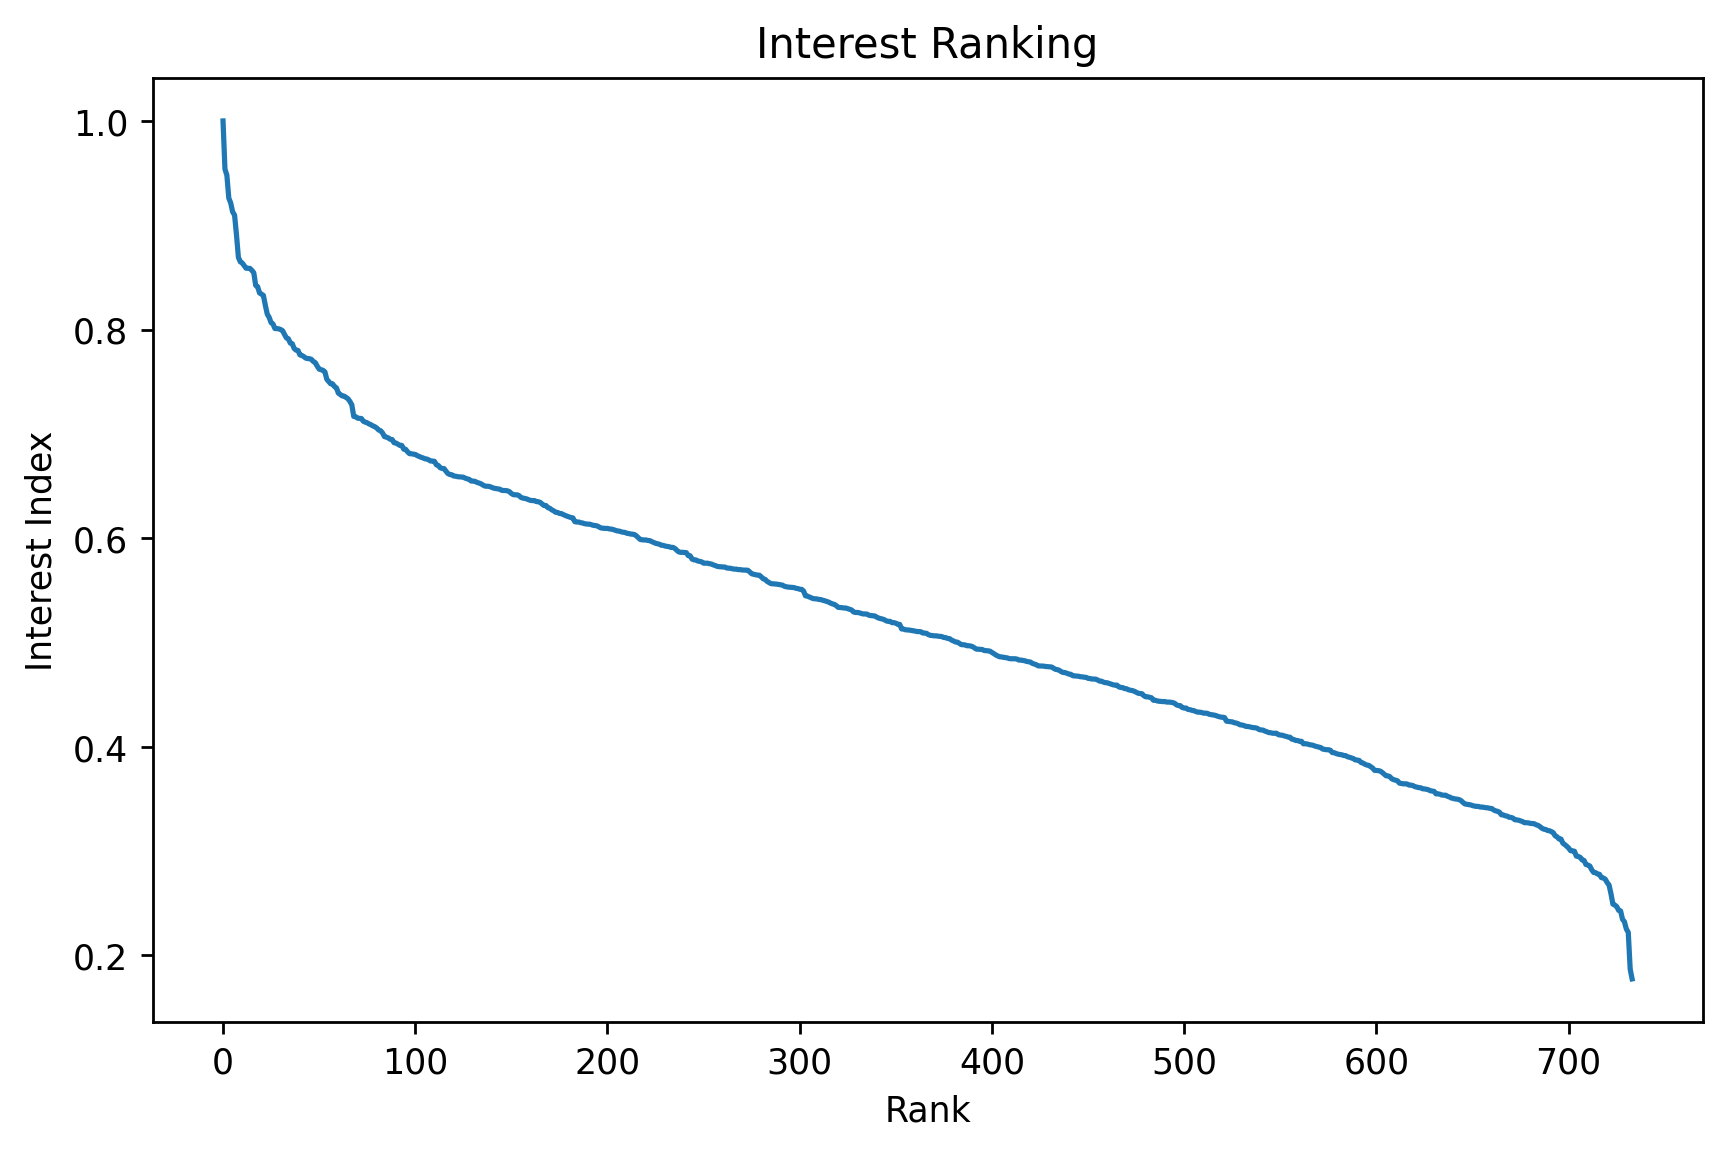

In [258]:
fig = plt.figure(figsize=(8,5), dpi=250)

plt.title('Interest Ranking')
plt.xlabel('Rank')
plt.ylabel('Interest Index')

plt.plot(interestAll[::-1])

In [276]:
sumDictAll

{'3345430261142179712': 1124,
 '3405448924408669568': 1183,
 '3447940375899790080': 1406,
 '5198649172658958592': 1427,
 '5568795604620017280': 1471,
 '6451619535242414464': 1486,
 '3447940131082979584': 1537,
 '4607839243856979968': 1540,
 '5030252094915031552': 1563,
 '4962089245941784192': 1572,
 '4788572429743836160': 1578,
 '6525128175391610368': 1641,
 '4921329456545064448': 1694,
 '5622246541344280960': 1709,
 '3393303134852663936': 1730,
 '3408386437224123136': 1736,
 '5841439235224263552': 1739,
 '5513187941488438784': 1759,
 '2007818737548134912': 1761,
 '3343781814038092800': 1769,
 '5551323432844858112': 1770,
 '5226971213502377728': 1786,
 '4056837958180606208': 1809,
 '5322896391789742208': 1815,
 '429864142589339392': 1818,
 '429674889148949632': 1843,
 '3443752679708373120': 1846,
 '3346371133858274304': 1862,
 '5521498978099563904': 1867,
 '6344579776176709248': 1869,
 '5768263884531936256': 1899,
 '4814407242144736896': 1901,
 '5231111669359826176': 1902,
 '4301887733

In [295]:
lcID = 3345430261142179712
id_mask = stars_x['id'] == lcID
xtime = stars_x[id_mask]['xtime'][0].value

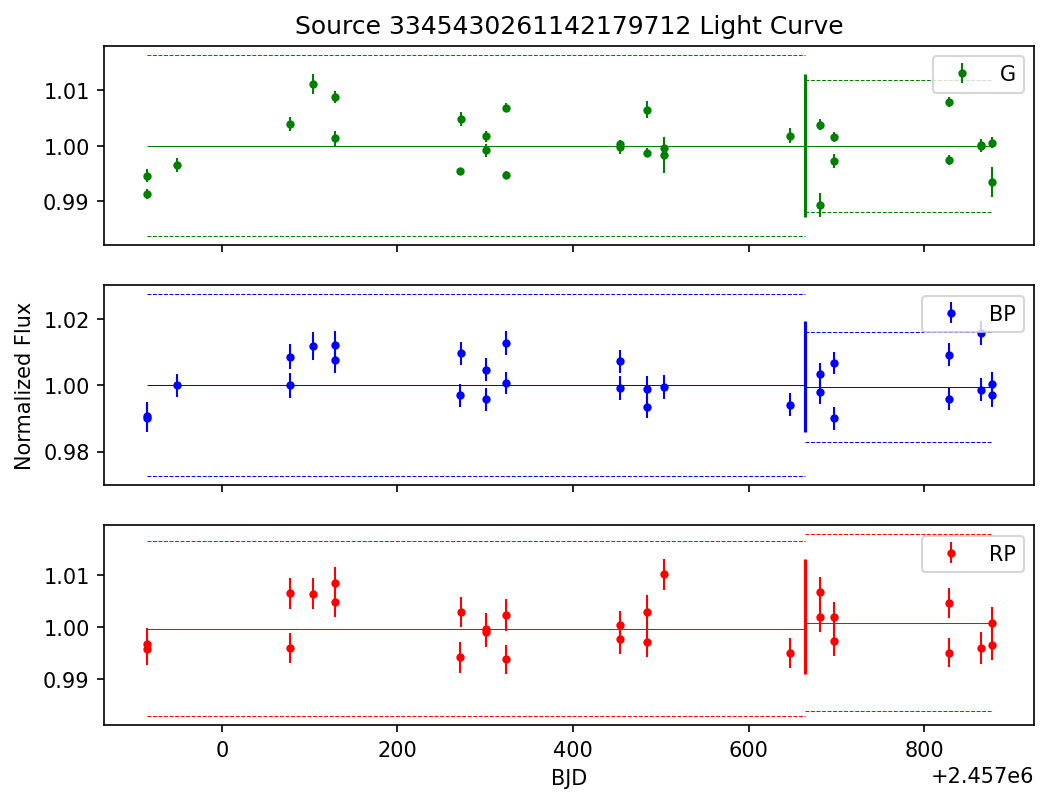

In [297]:
lightCurve.plotLC(str(lcID), c1_x[id_mask], stars_x[id_mask], glcDict, bplcDict, rplcDict, y='flux', time=xtime, err=False)
plt.savefig('../Figures/Least_Interesting_NonEB.pdf', dpi=500, format='pdf', bbox_inches='tight')